In [11]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from feature_engine import imputation 
from feature_engine import discretisation 
from feature_engine import encoding   
from feature_engine import outliers
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,Normalizer,MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,make_scorer,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as  xg
from myclass.myclass import Binning
#import sklearn.warnings
#warnings.filterwarnings('ignore')


In [12]:
dataset=pd.read_csv('water_potability.csv')

In [13]:
dataset.shape

(3276, 10)

In [14]:
dataset.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [15]:
dataset['Potability'].value_counts()/dataset.shape[0]*100

0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [16]:
dataset['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Distribution of Drinkable Water')

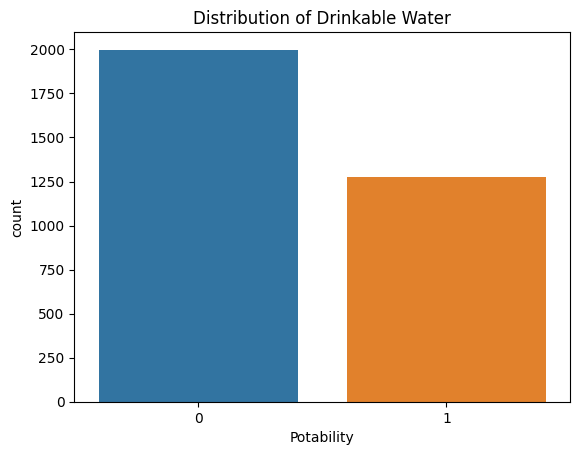

In [17]:
sns.countplot(x=dataset['Potability']).set_title("Distribution of Drinkable Water")

In [18]:
dataset.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [20]:
dataset.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [21]:
dataset.duplicated().sum()

0

In [22]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [23]:
dataset.isna().sum()/dataset.shape[0]*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

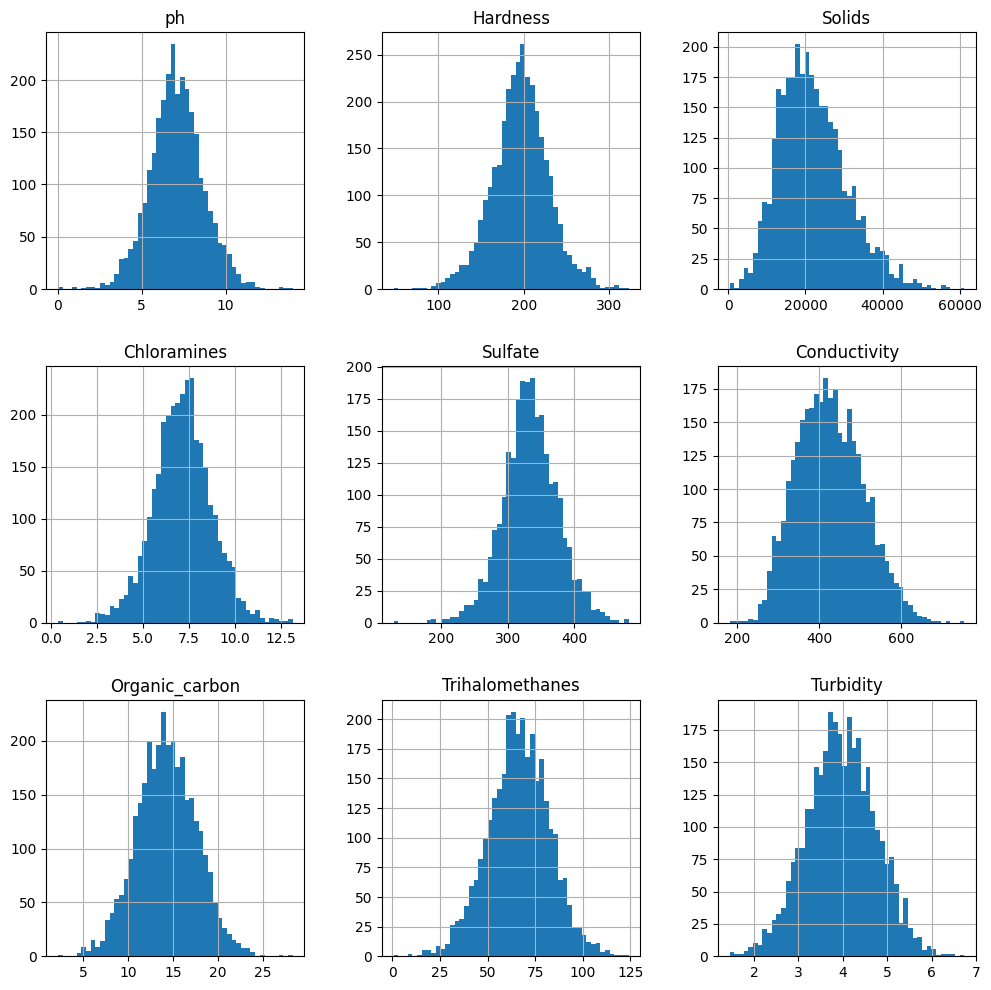

In [24]:
dataset.drop(columns='Potability').hist(bins=50,density=False, figsize=(12,12))
plt.show()

In [25]:
dataset.apply(lambda x: x.corr(dataset['Potability']))

ph                -0.003556
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.023577
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.007130
Turbidity          0.001581
Potability         1.000000
dtype: float64

<AxesSubplot: >

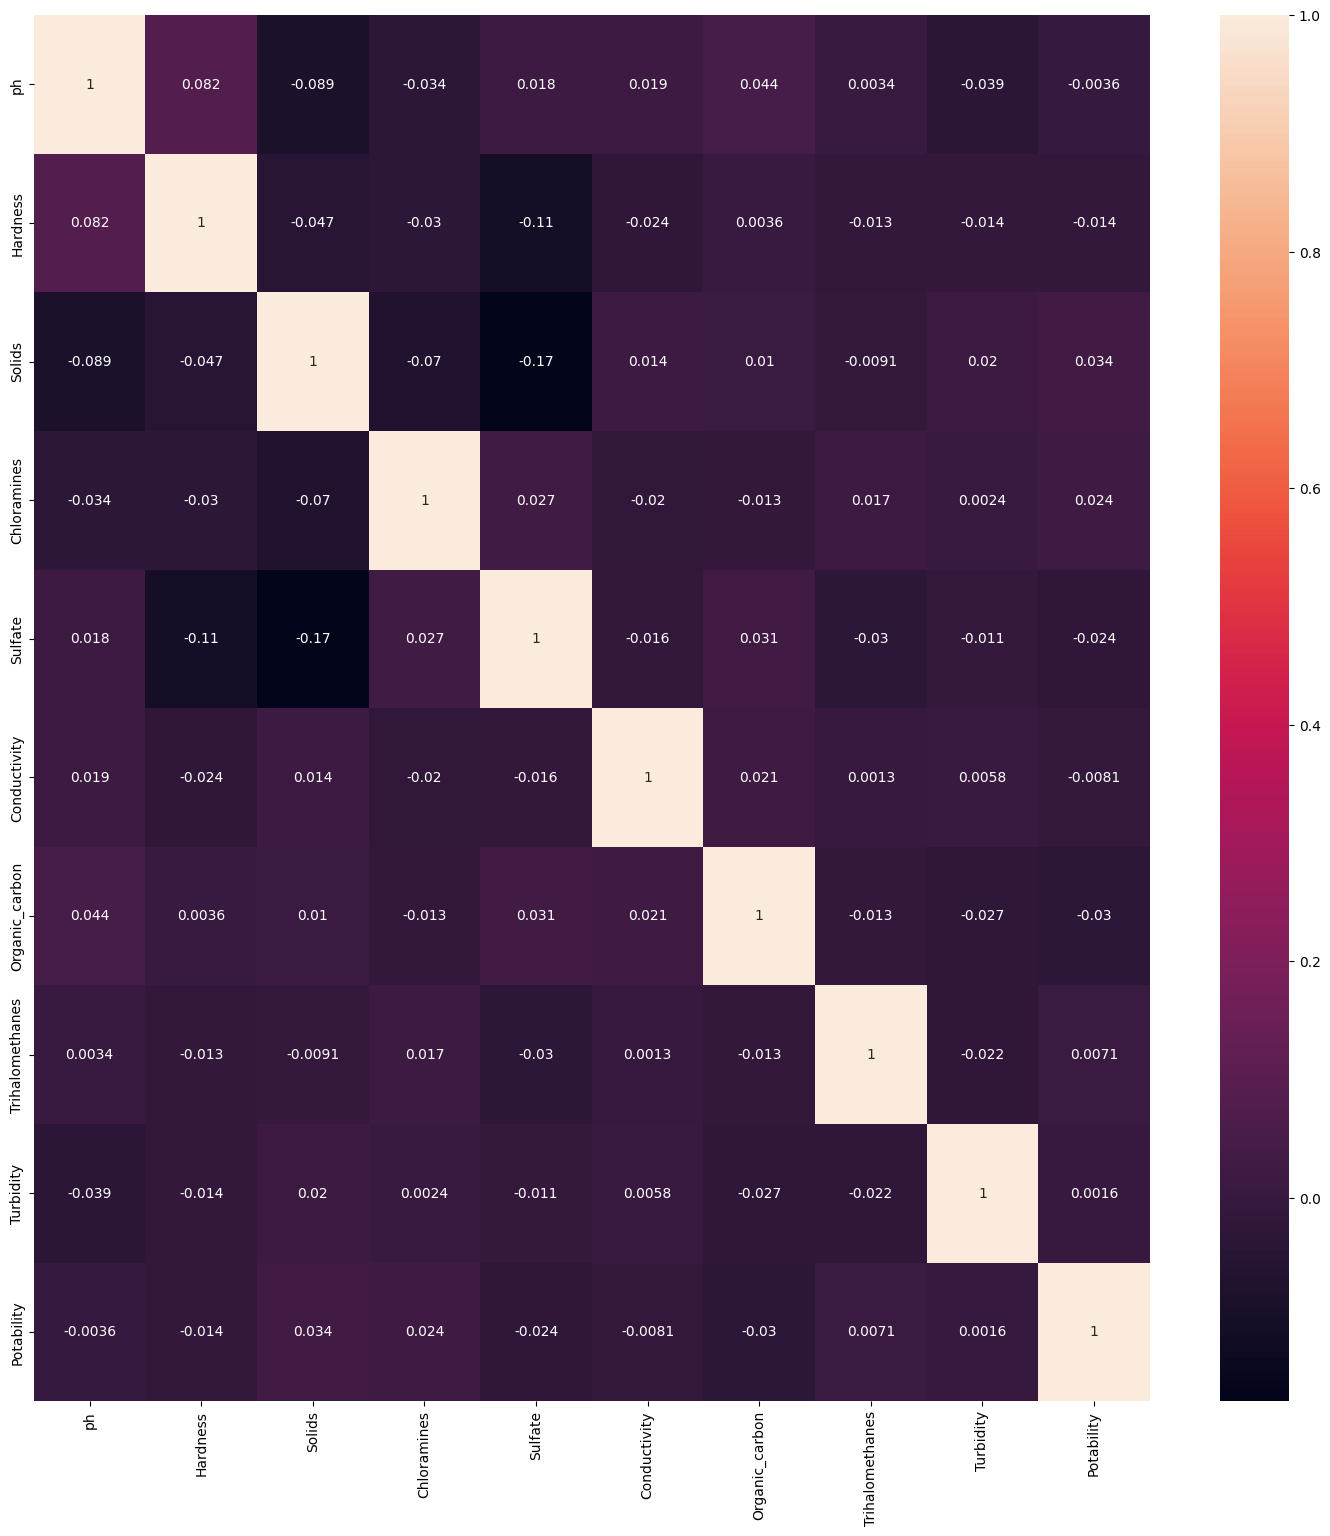

In [26]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(dataset.corr(), ax = ax, annot = True)

In [27]:
def diagnostic_plots(df, variable):
    
   # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16,4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable].dropna(), bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable].dropna(), dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable].dropna())
    plt.title('Boxplot')

    plt.show()

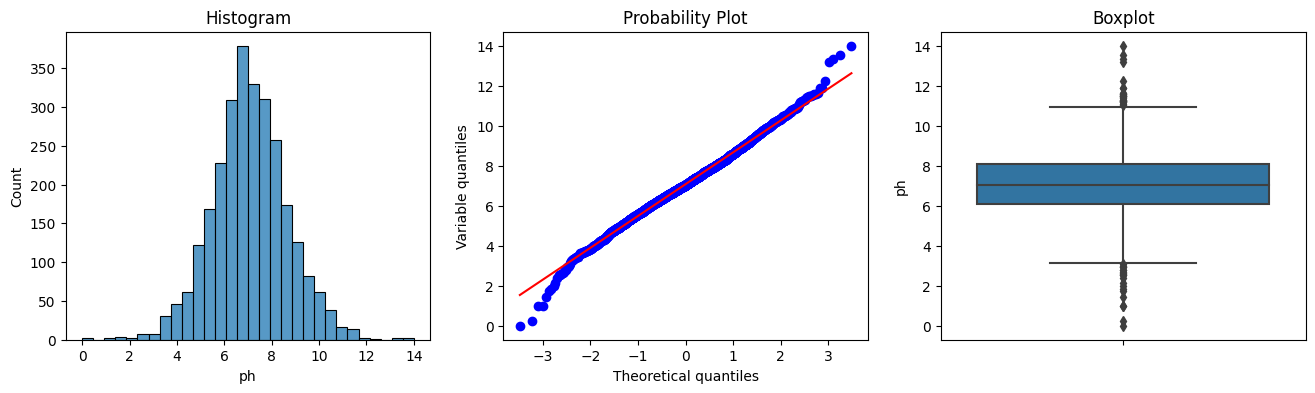

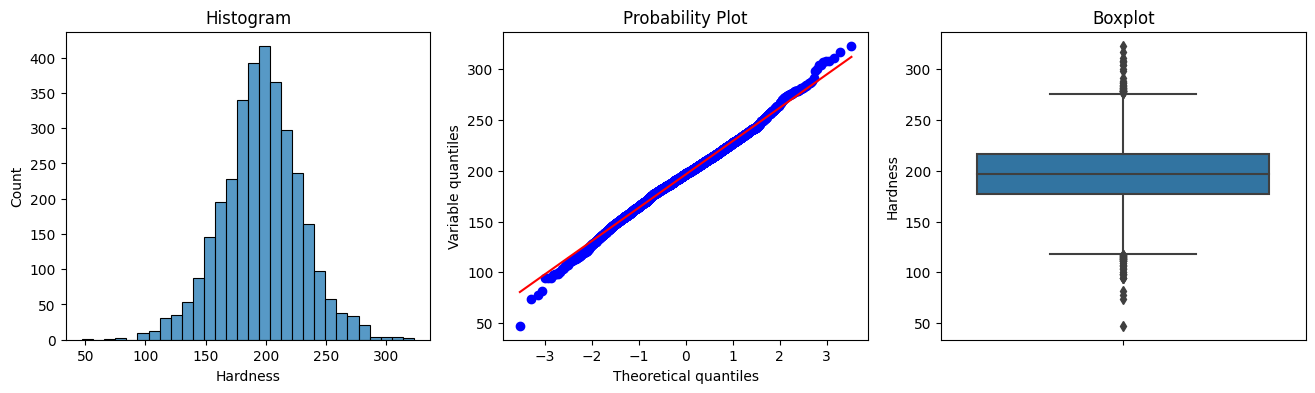

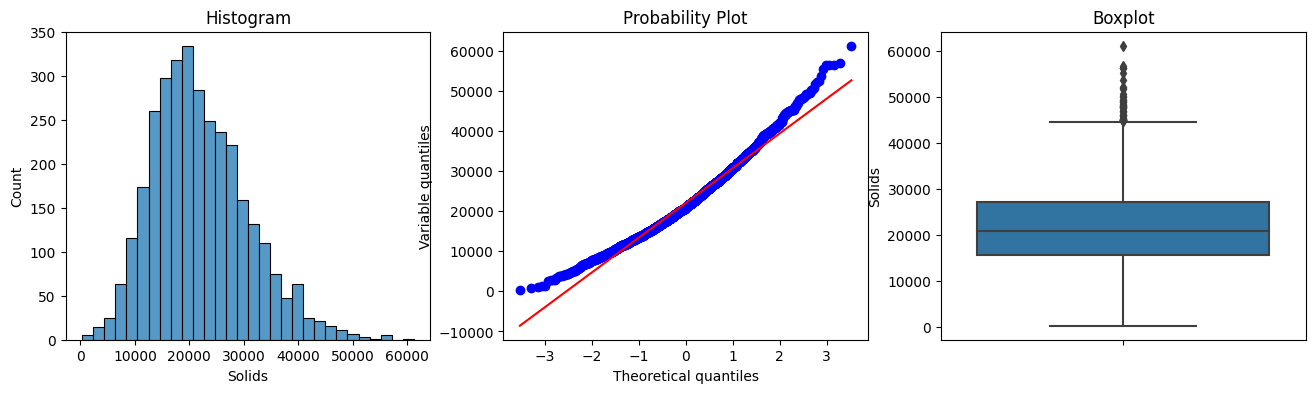

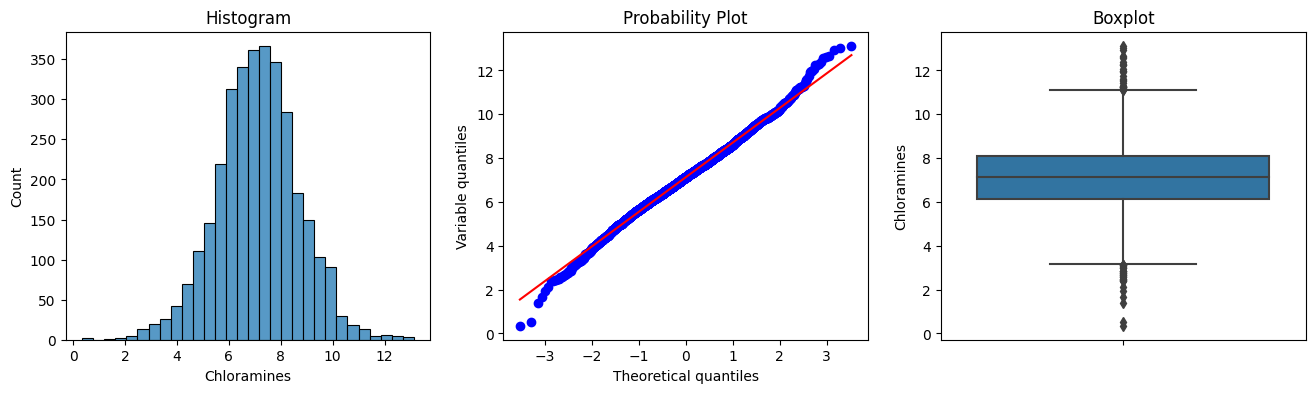

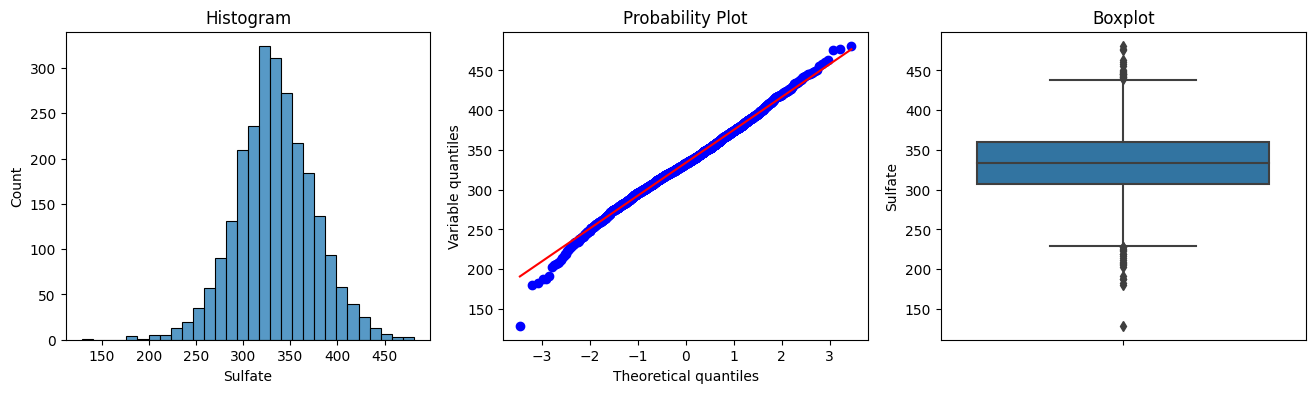

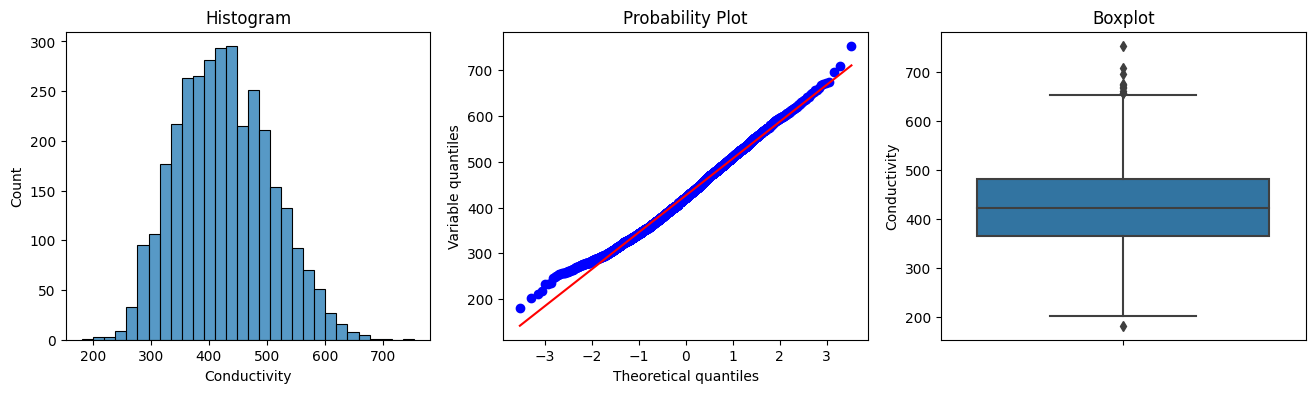

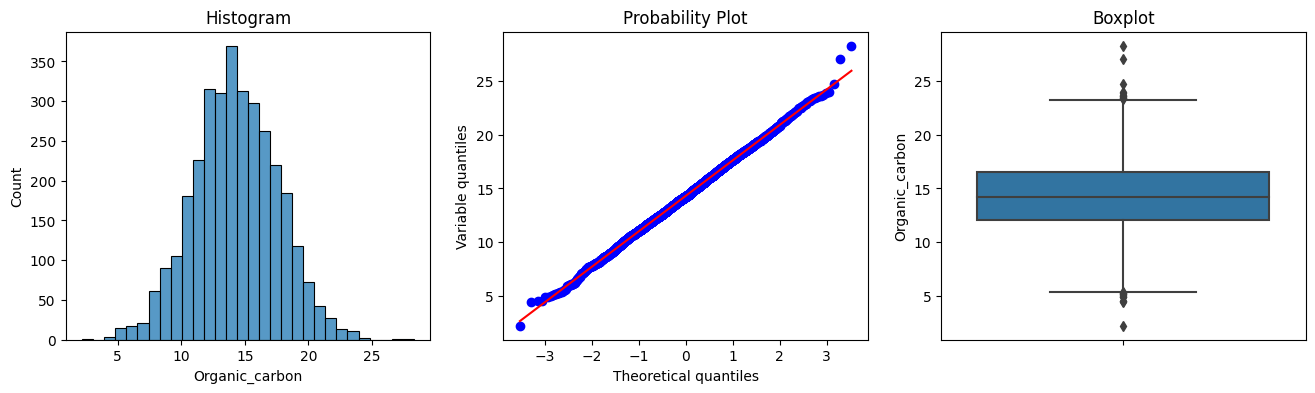

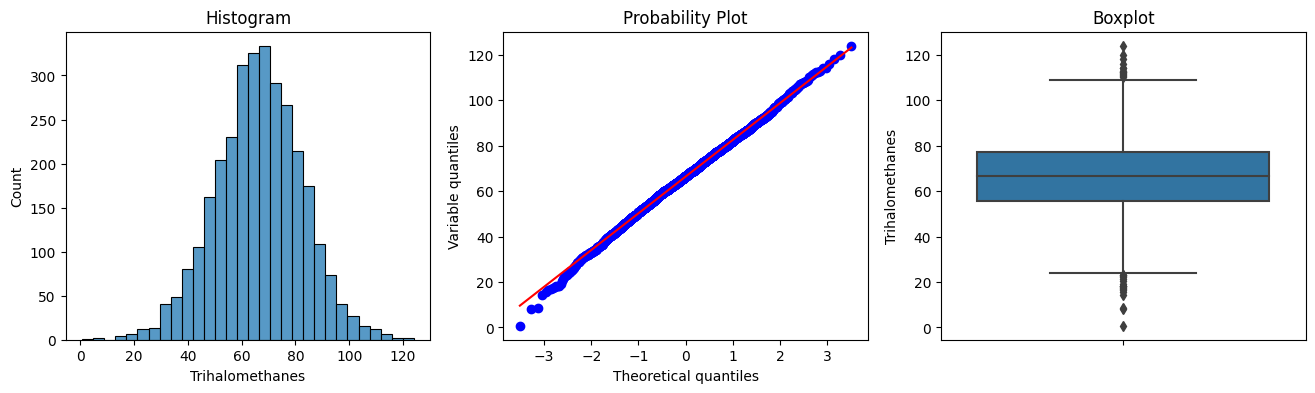

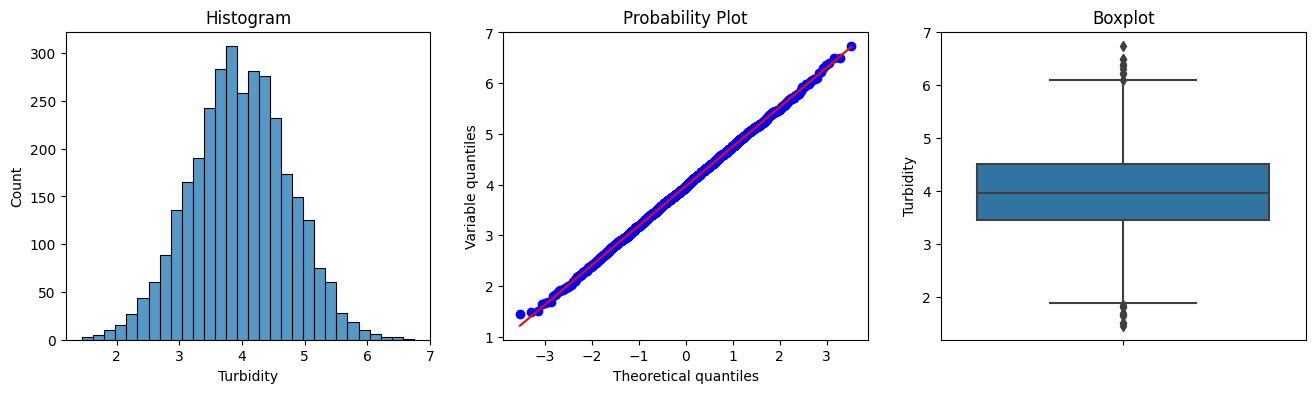

In [28]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"
for col in dataset.drop('Potability',axis=1).columns:
    diagnostic_plots(dataset, col)

deal with missing values

In [29]:
dataset[dataset['Trihalomethanes'].isnull()]['Potability'].value_counts()

0    107
1     55
Name: Potability, dtype: int64

In [30]:
dataset[dataset['Trihalomethanes'].isnull()]['Potability'].value_counts()/dataset.shape[0]*100

0    3.266178
1    1.678877
Name: Potability, dtype: float64

In [31]:
dataset['Potability'].value_counts()/dataset.shape[0]*100

0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [32]:
dataset[dataset['Trihalomethanes'].notnull()]['Potability'].value_counts()/dataset.shape[0]*100

0    57.722833
1    37.332112
Name: Potability, dtype: float64

In [33]:
#data=dataset[dataset['Trihalomethanes'].notnull()]

In [34]:
data=dataset

In [35]:
data.shape

(3276, 10)

In [36]:
target=data['Potability']

In [37]:
data=data.drop(columns='Potability')

In [38]:
cols=list(data.columns)

In [39]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225              NaN   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [40]:
dataimpu=KNNImputer().fit_transform(data)

In [41]:
dataimpu=pd.DataFrame(dataimpu,columns=cols)

In [42]:
dataimpu

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        64.327280   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

Column_Name: ph

 before


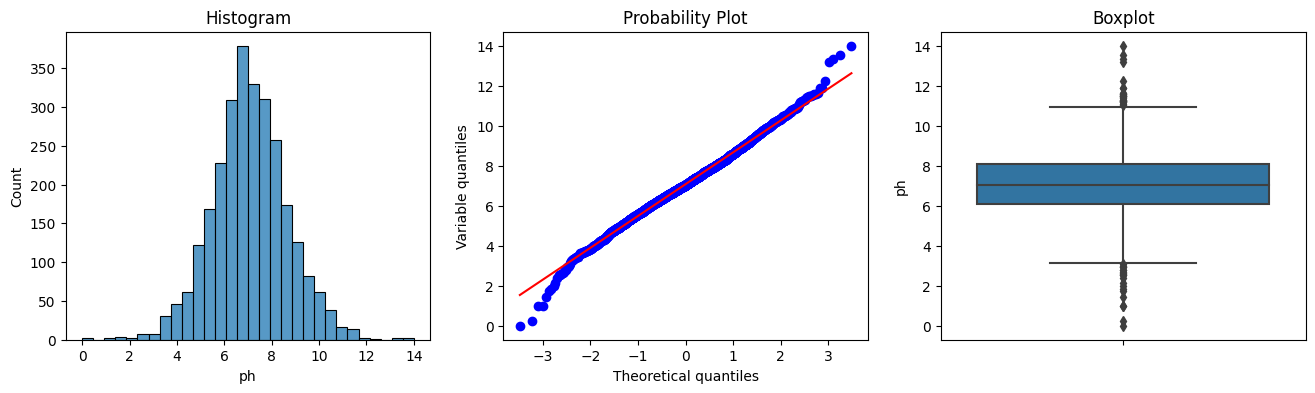


 after


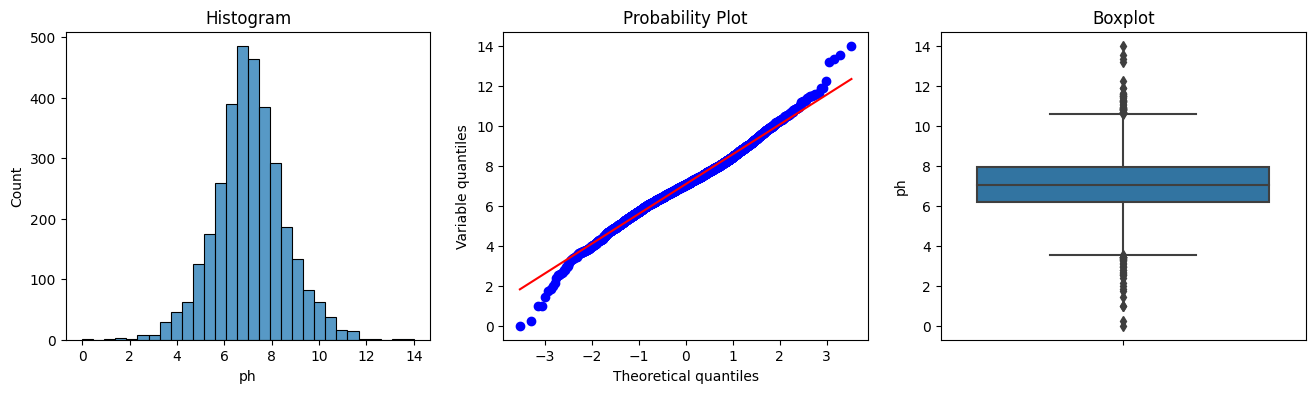

Column_Name: Hardness

 before


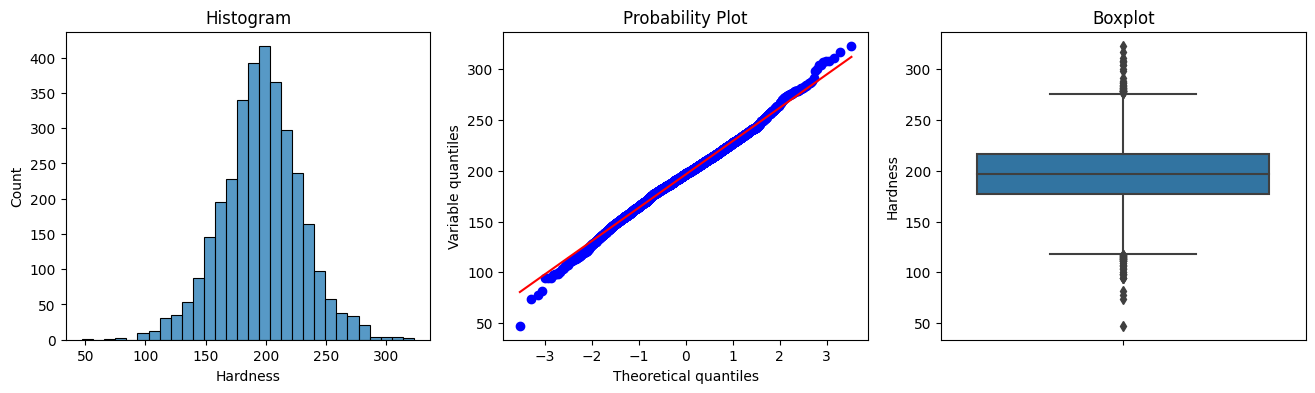


 after


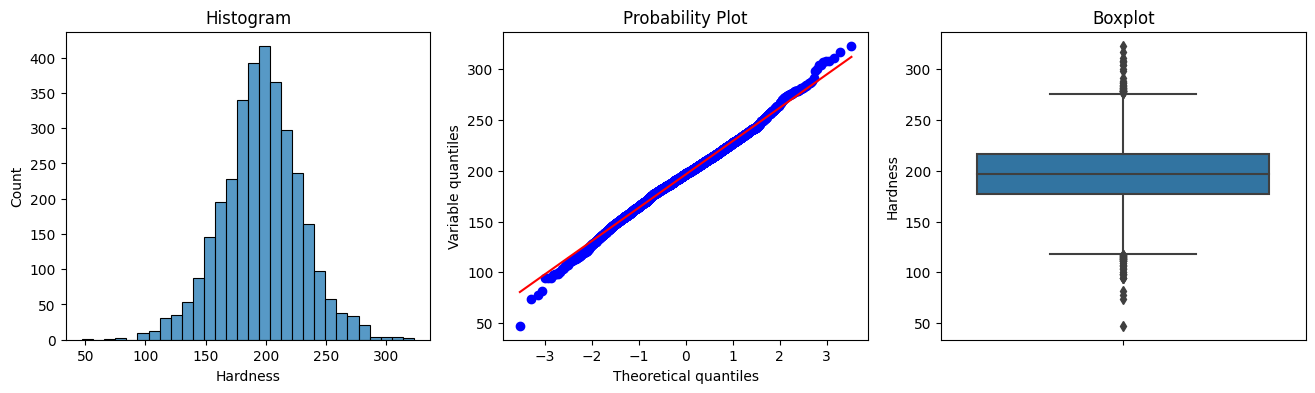

Column_Name: Solids

 before


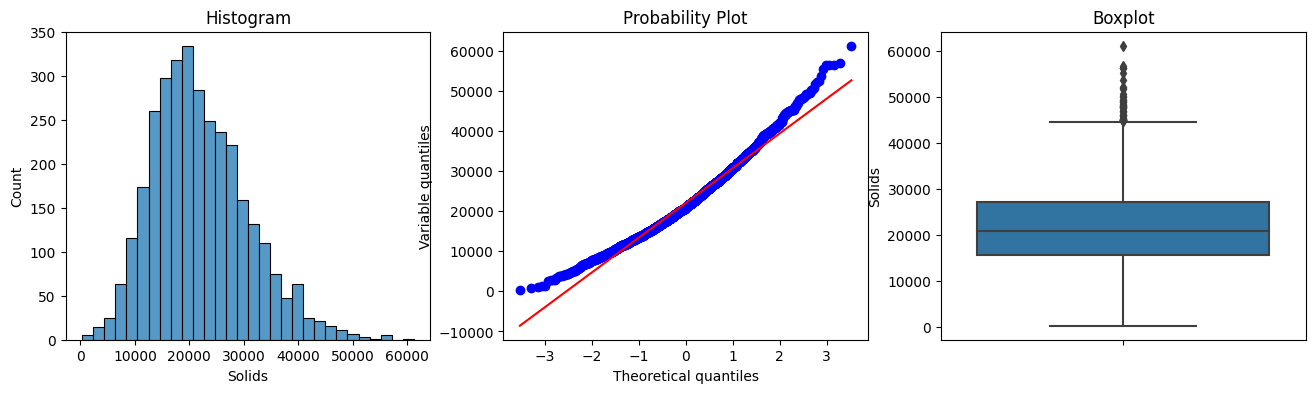


 after


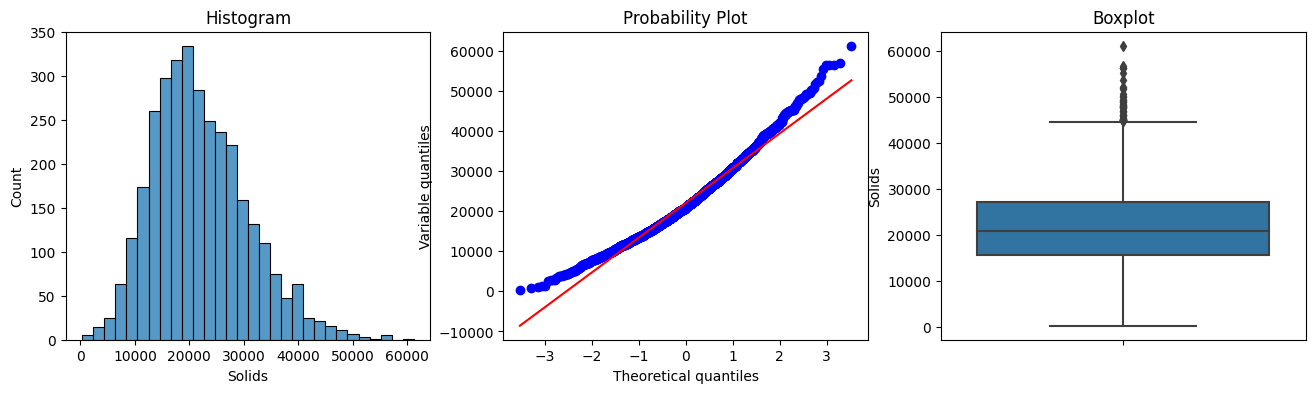

Column_Name: Chloramines

 before


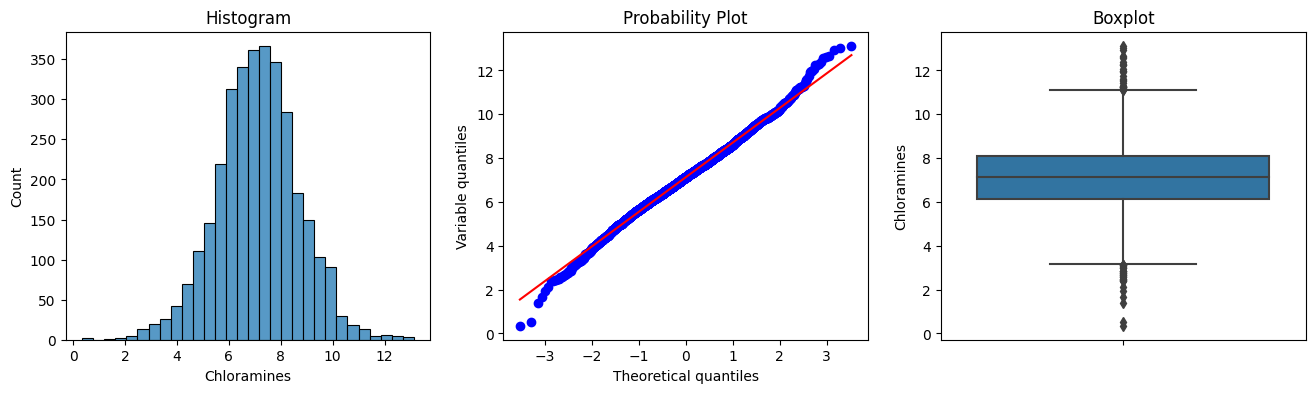


 after


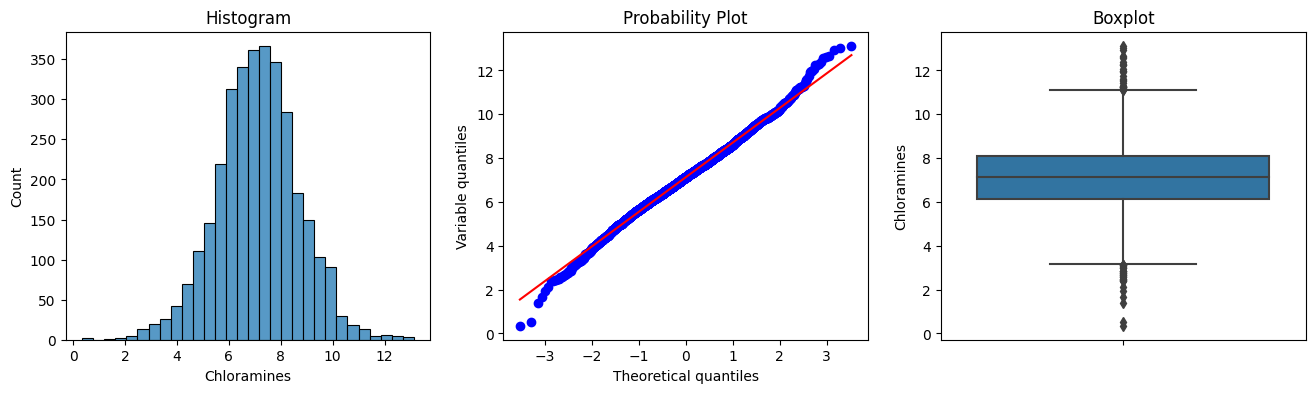

Column_Name: Sulfate

 before


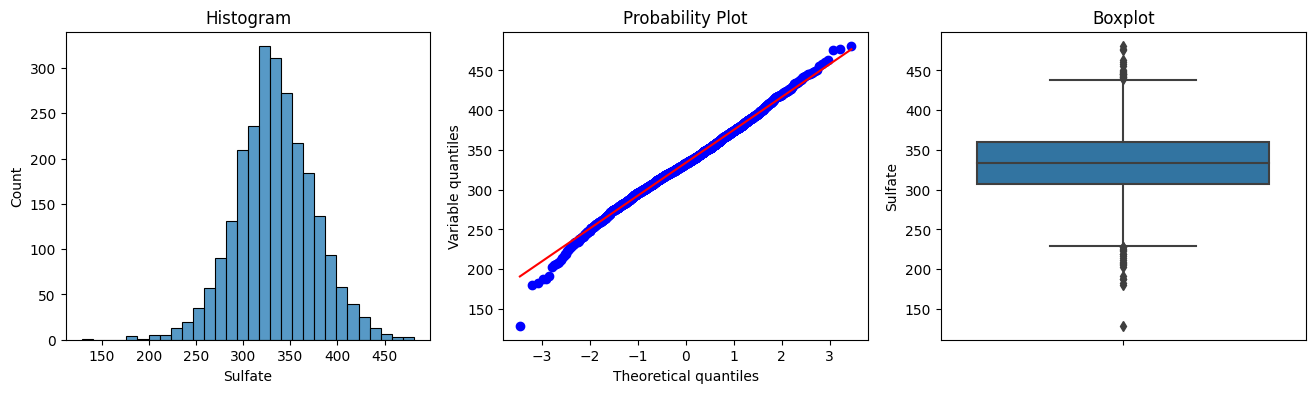


 after


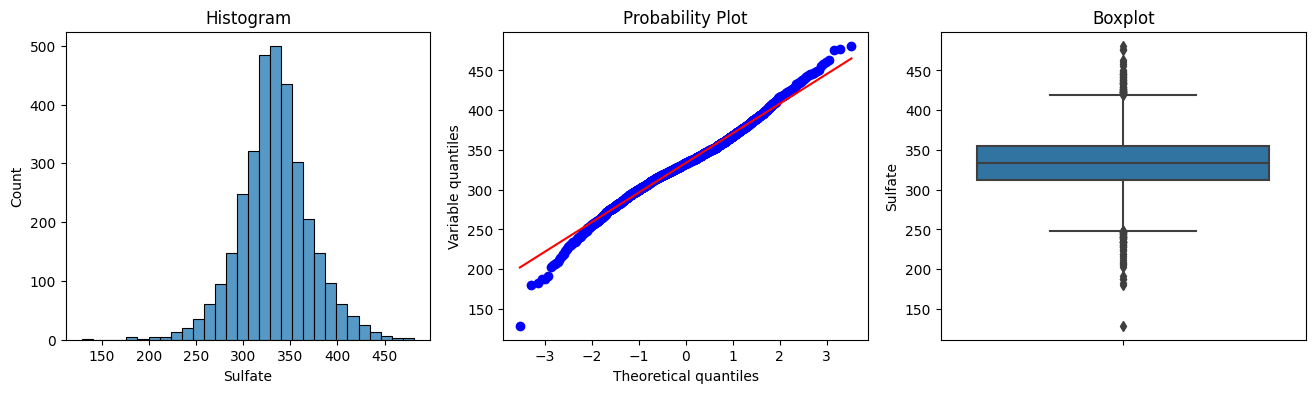

Column_Name: Conductivity

 before


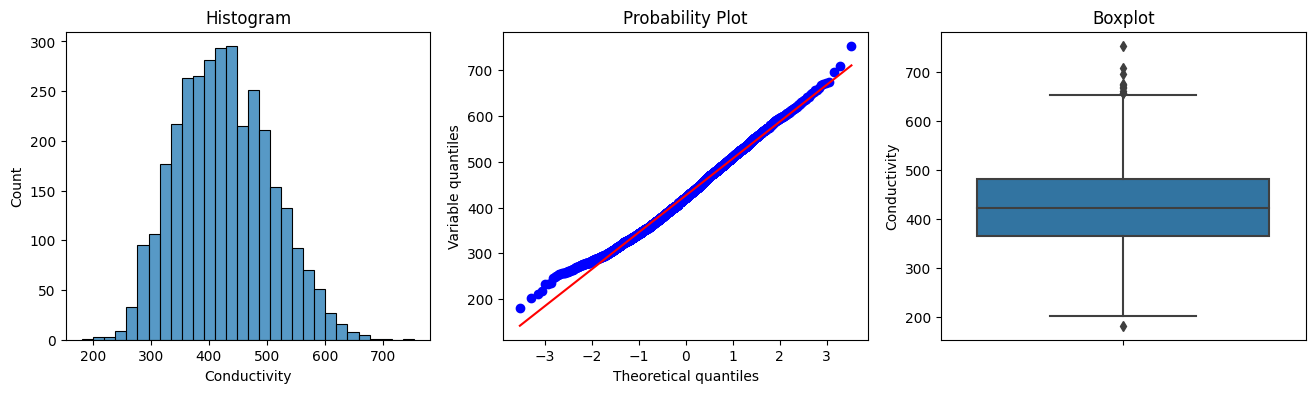


 after


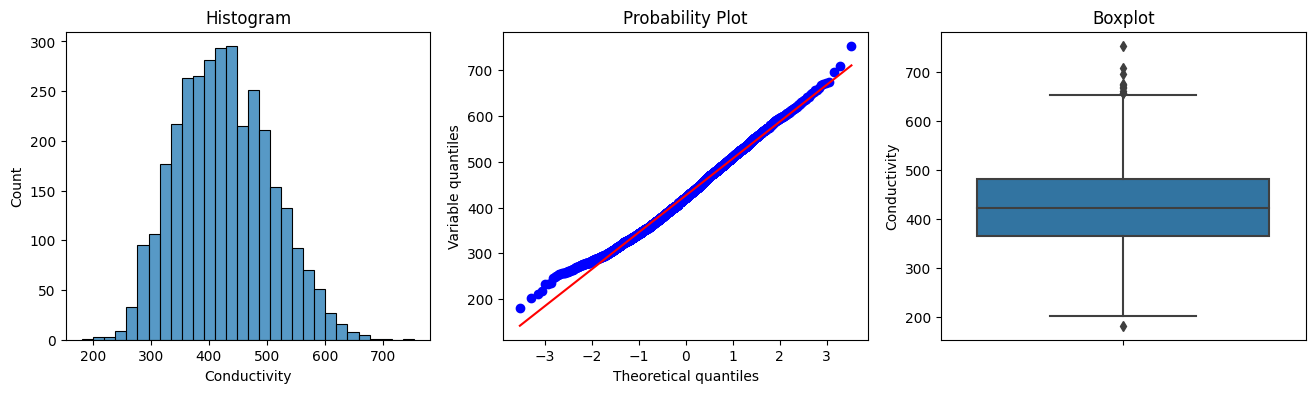

Column_Name: Organic_carbon

 before


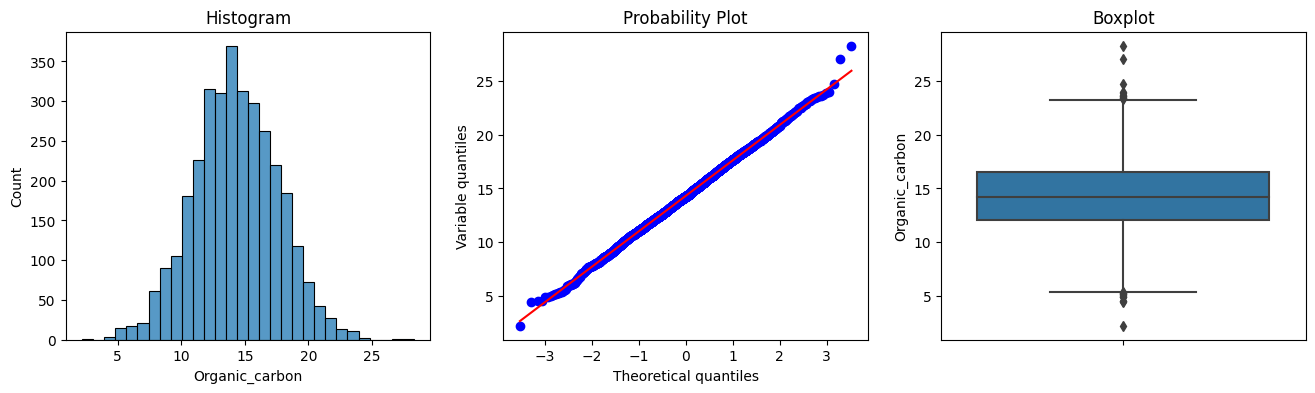


 after


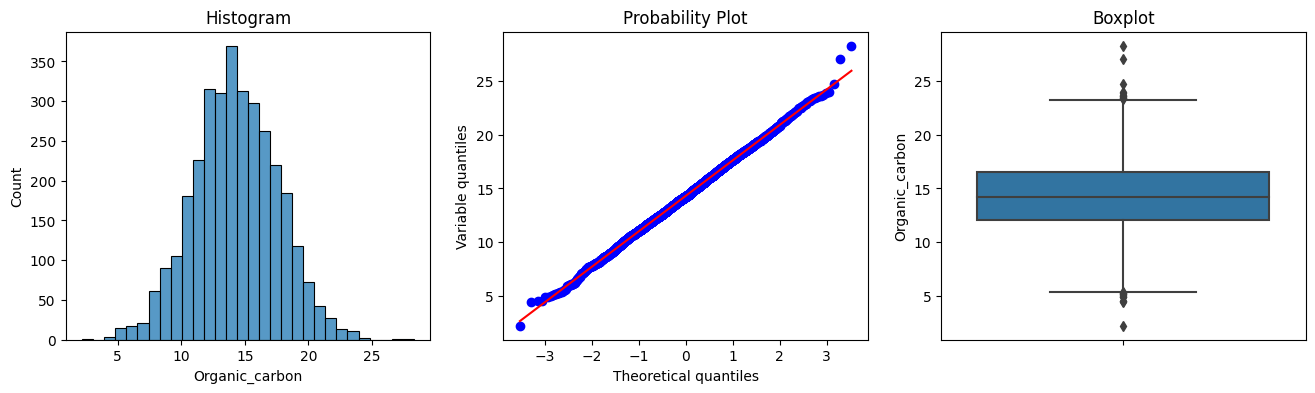

Column_Name: Trihalomethanes

 before


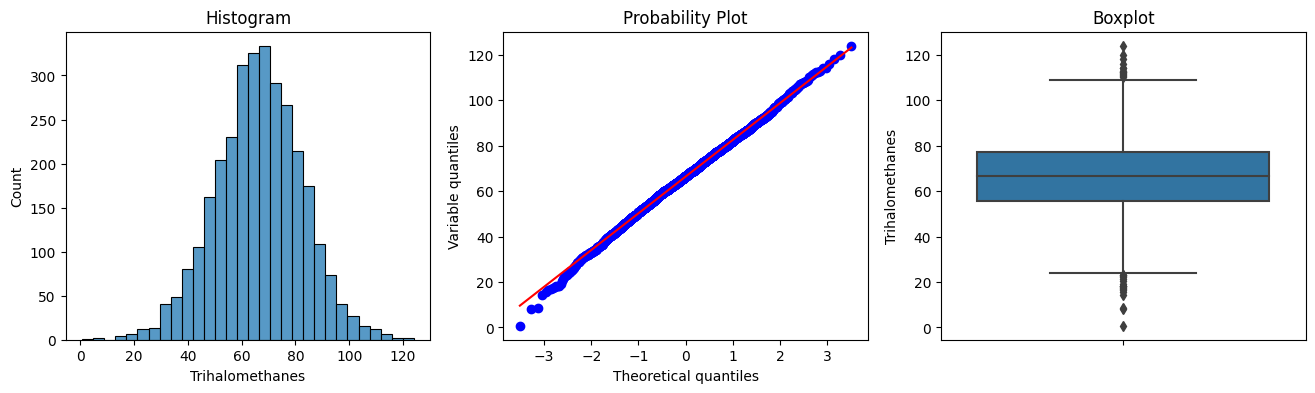


 after


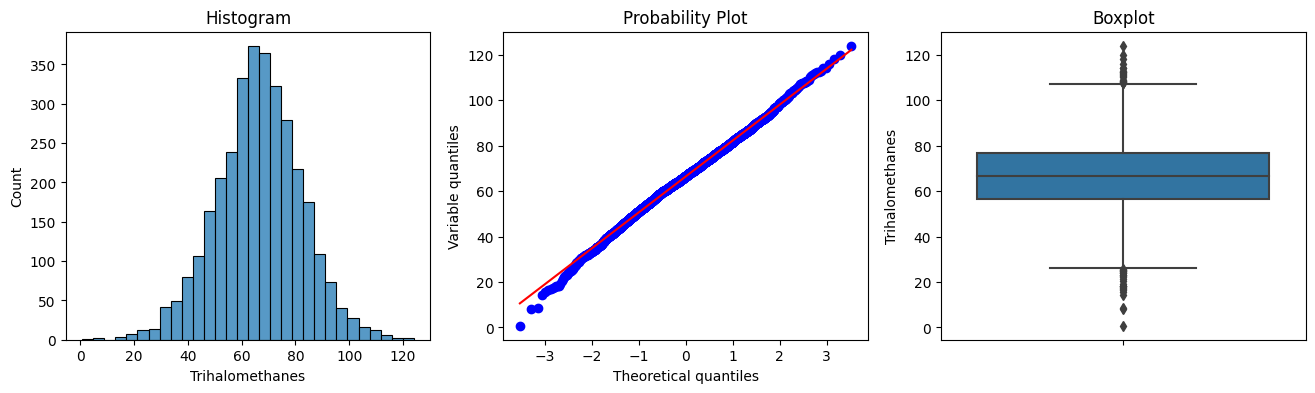

Column_Name: Turbidity

 before


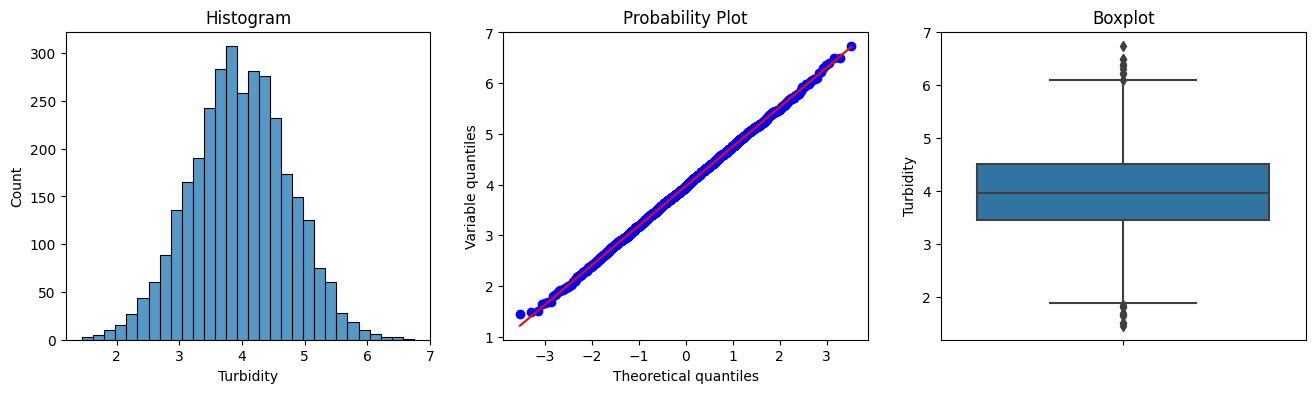


 after


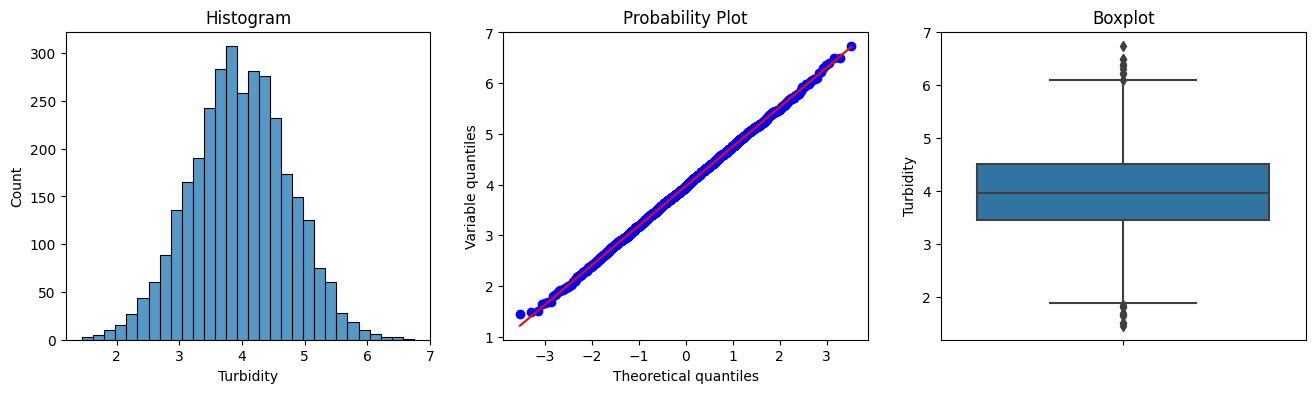

In [43]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"
for col in cols:
    print("Column_Name:",col)
    print('\n before')
    diagnostic_plots(data, col)
    print('\n after')
    diagnostic_plots(dataimpu, col)

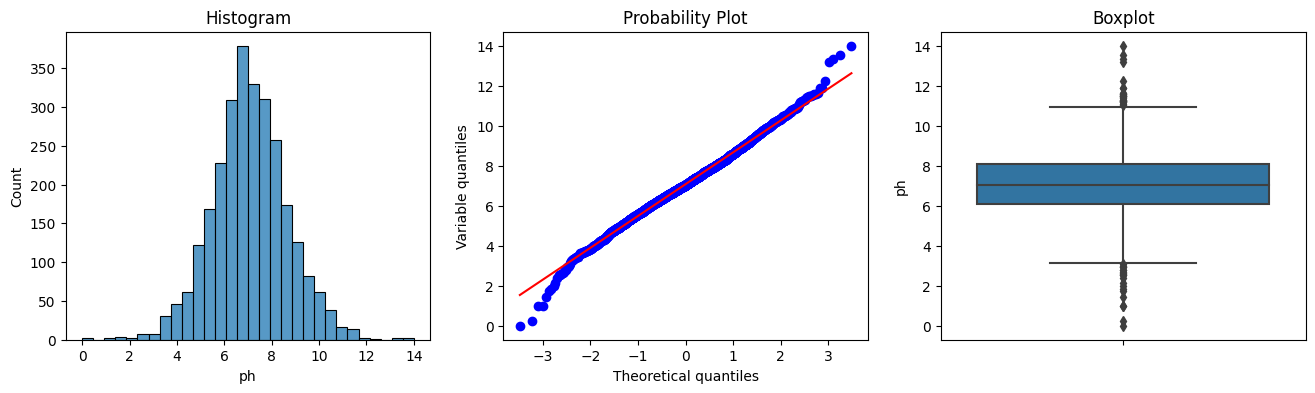

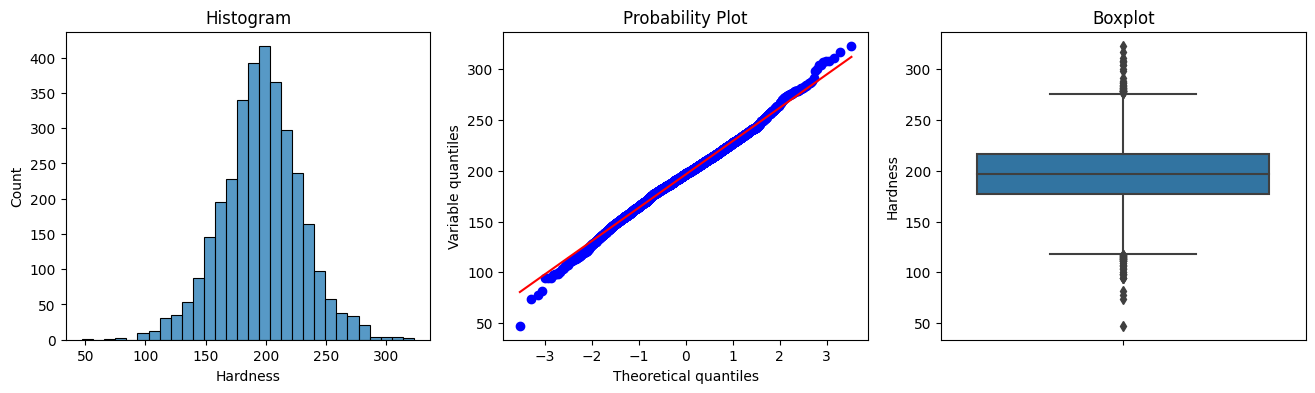

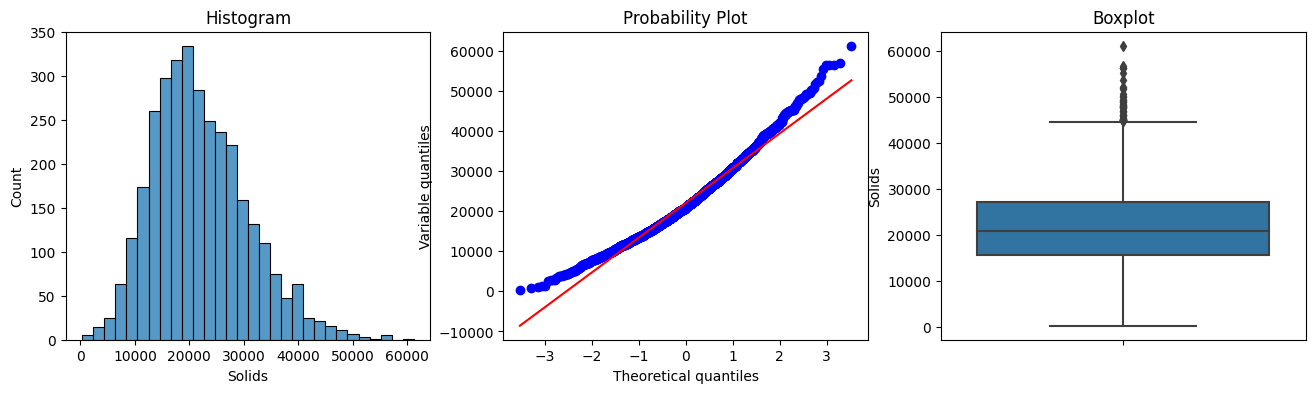

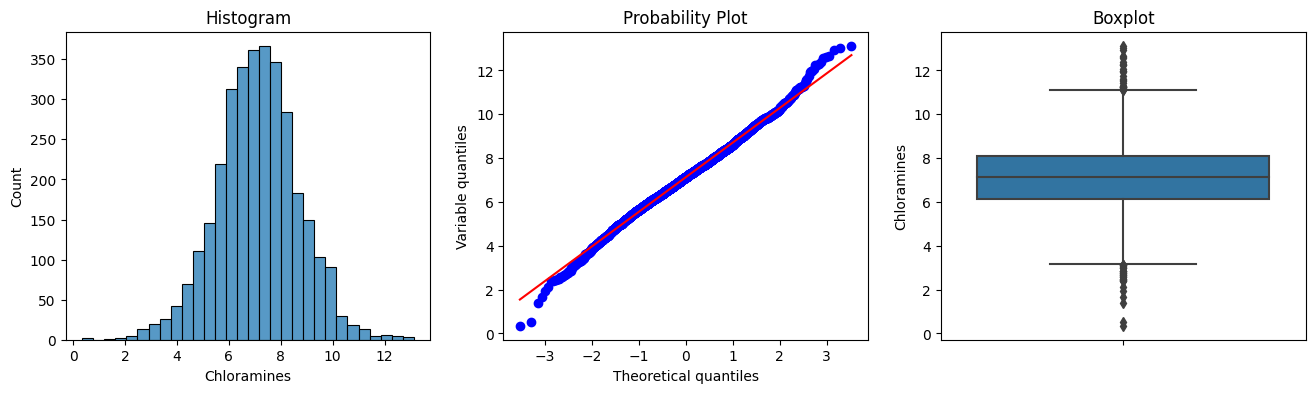

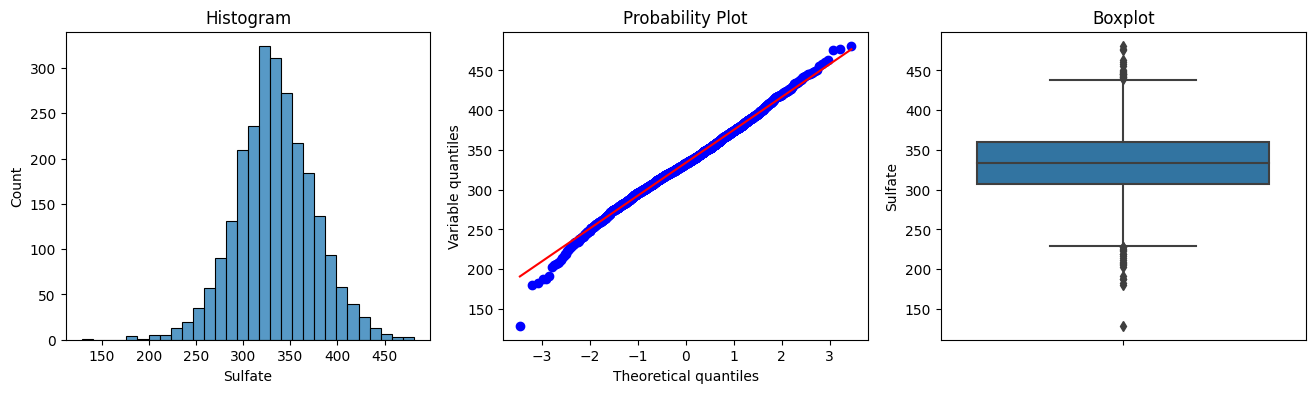

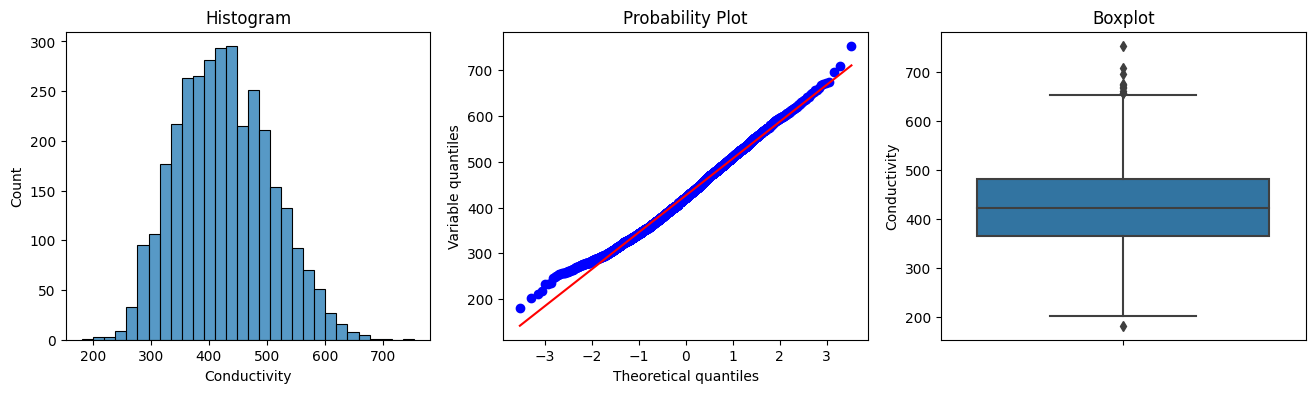

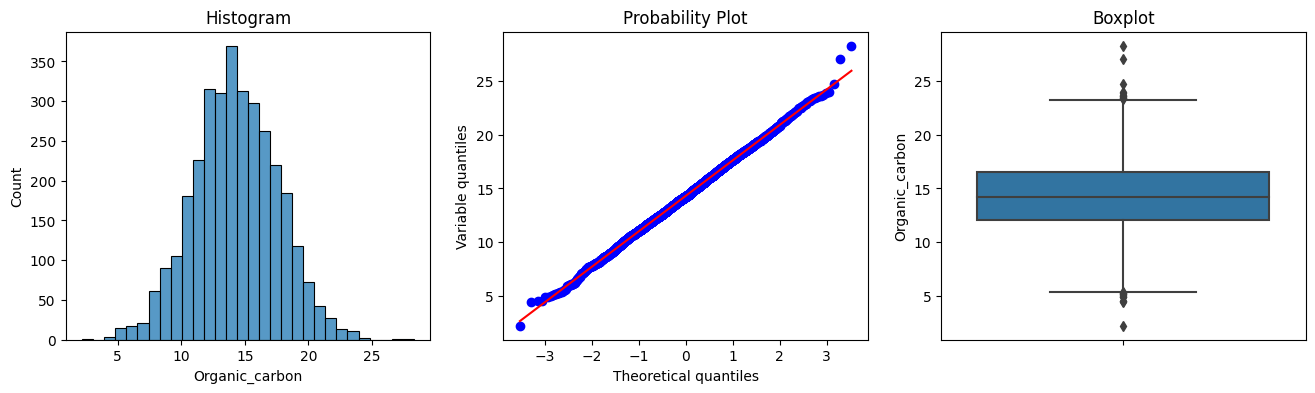

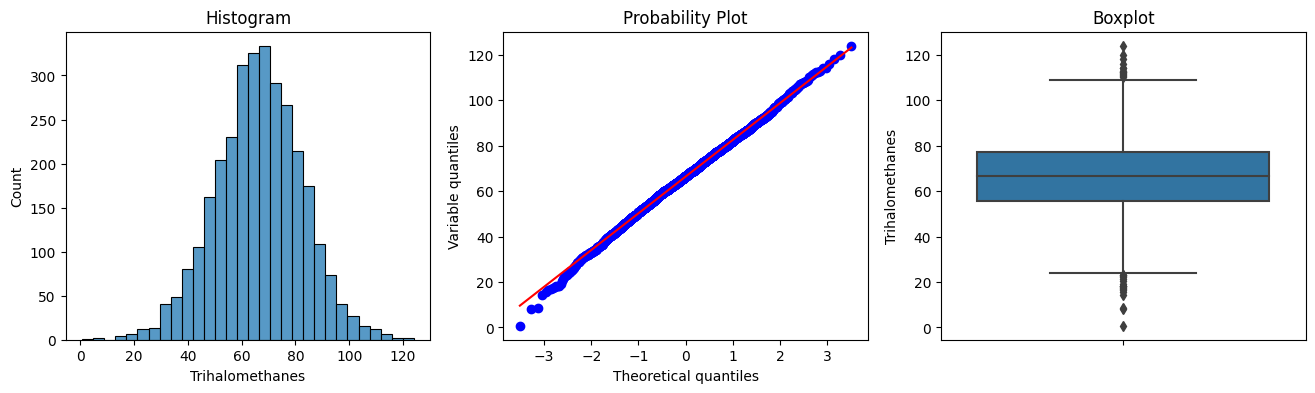

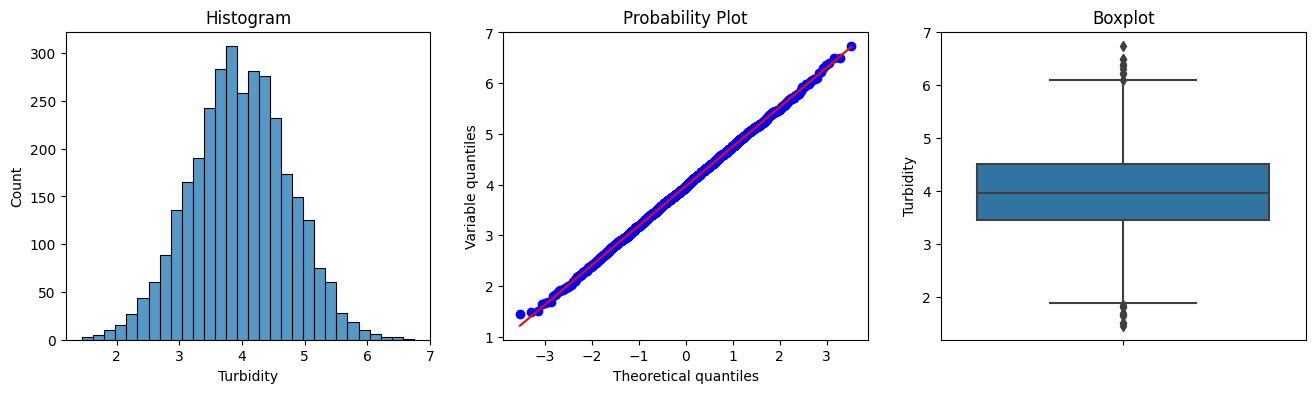

In [44]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"
for col in dataset.drop('Potability',axis=1).columns:
    diagnostic_plots(dataset, col)

OUTLIER


In [45]:
outliers_method=['IQR']

 tail=both

Column_Name: ph

 before


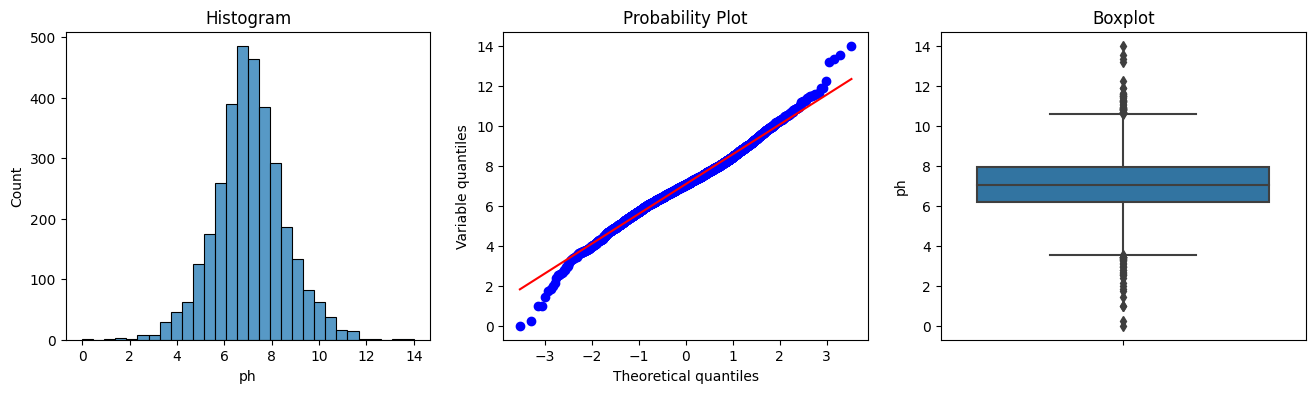


 after


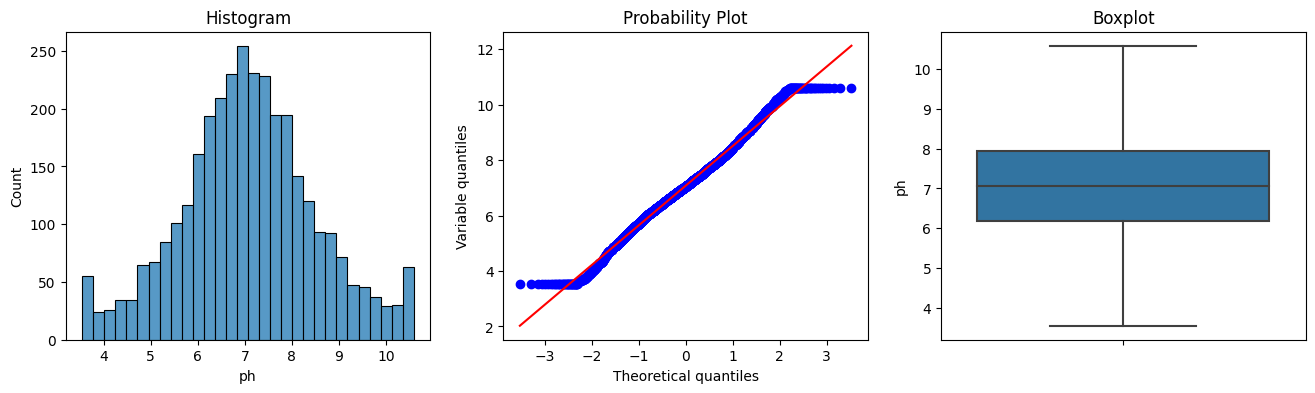

Column_Name: Hardness

 before


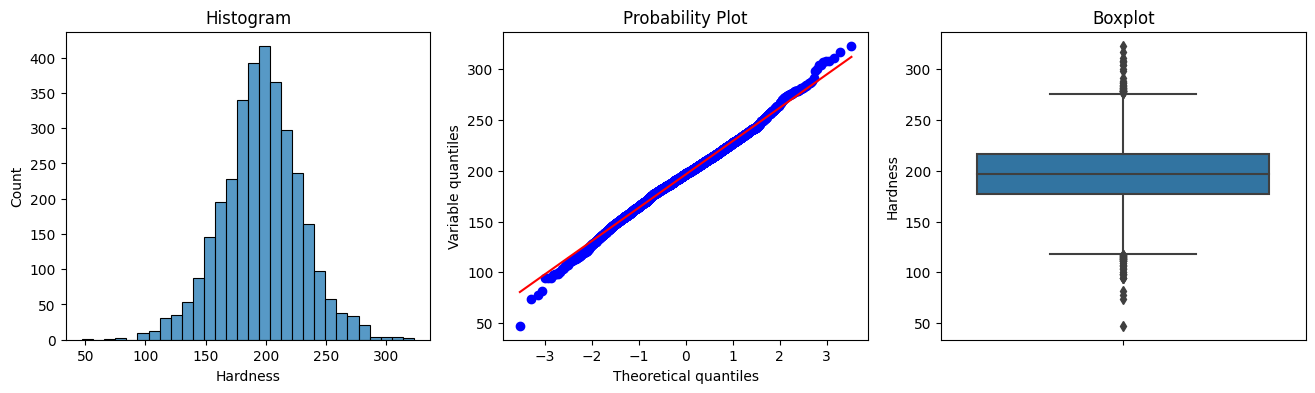


 after


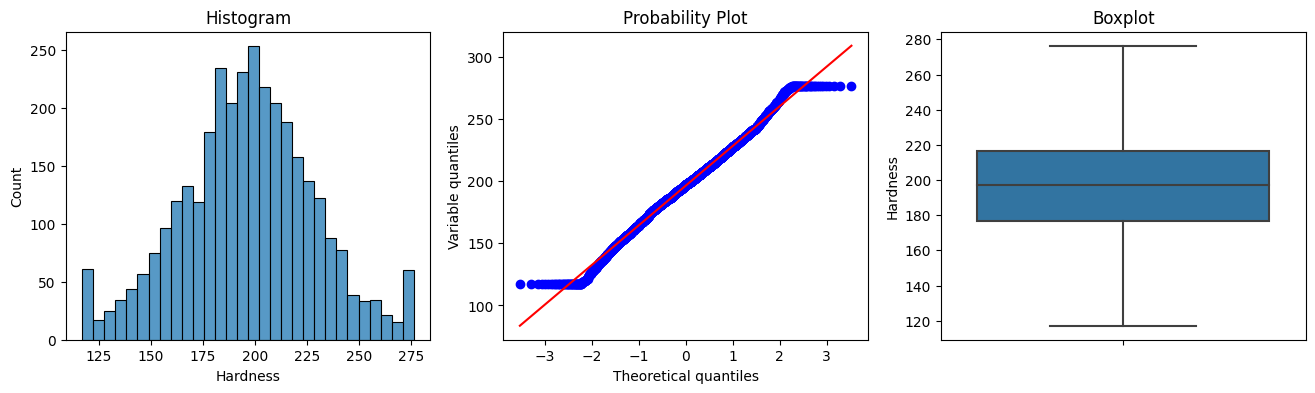

Column_Name: Solids

 before


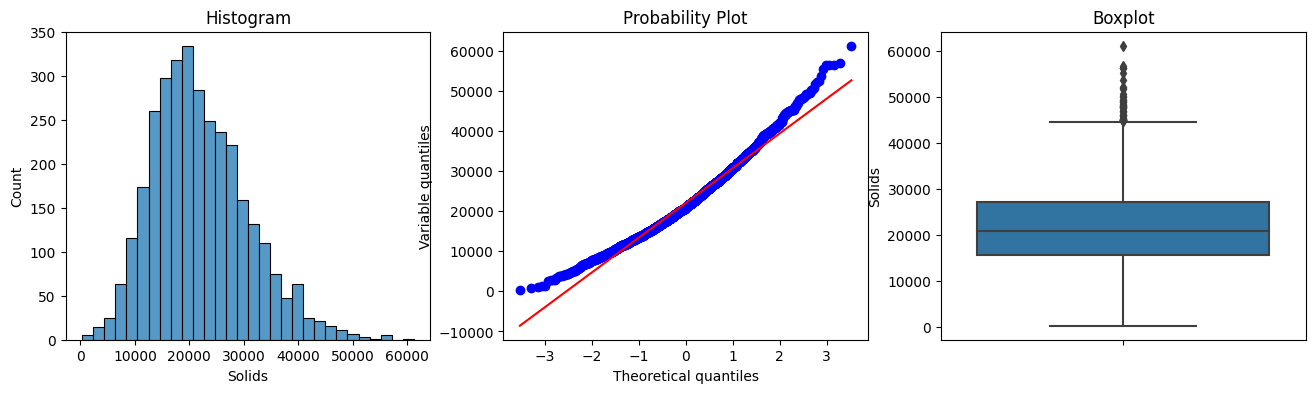


 after


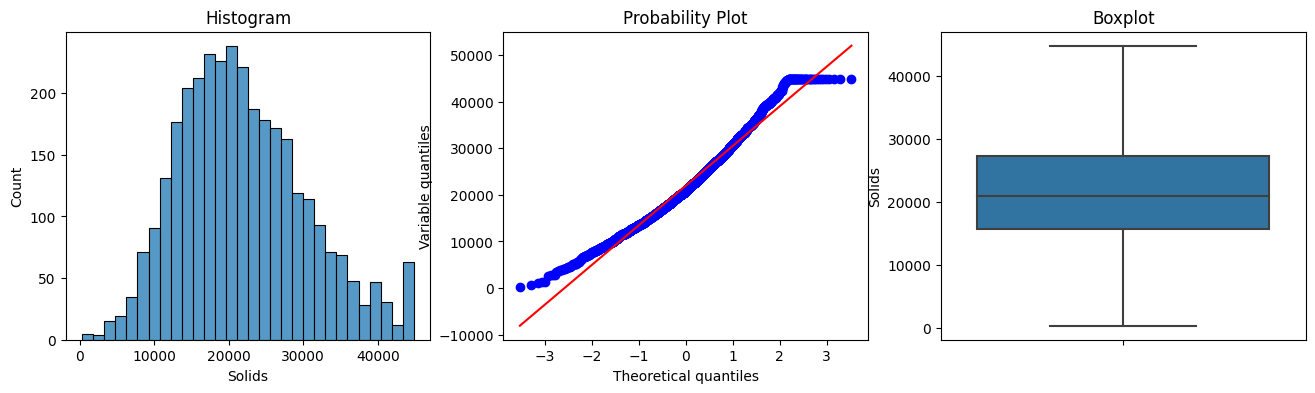

Column_Name: Chloramines

 before


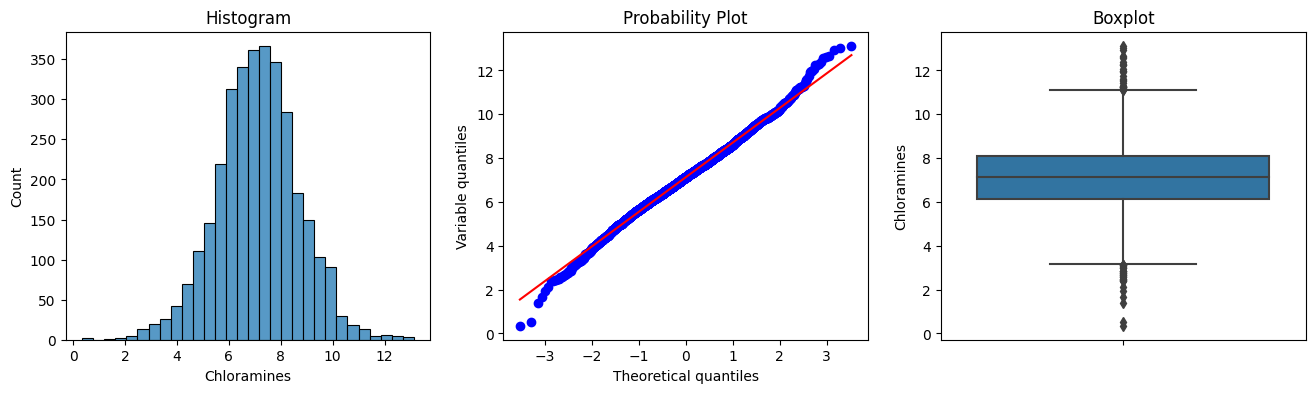


 after


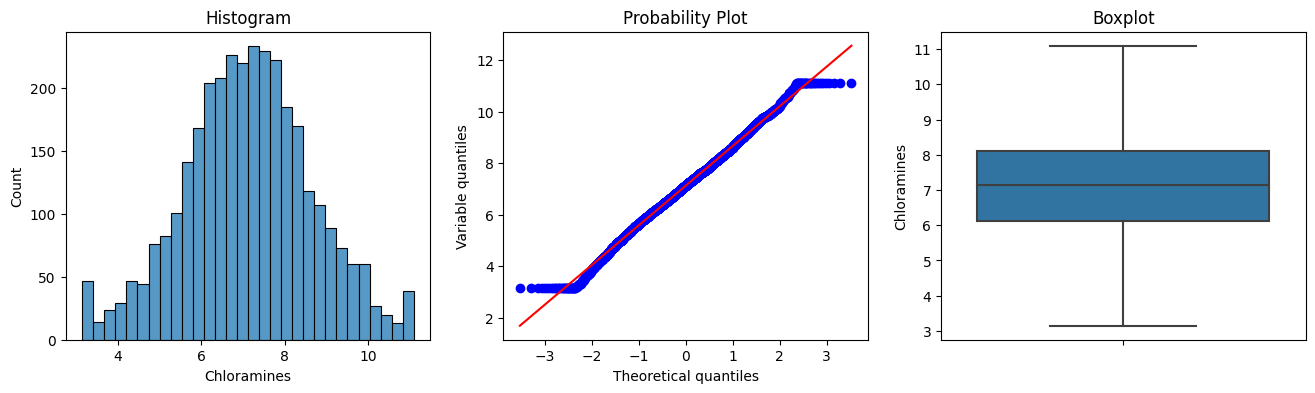

Column_Name: Sulfate

 before


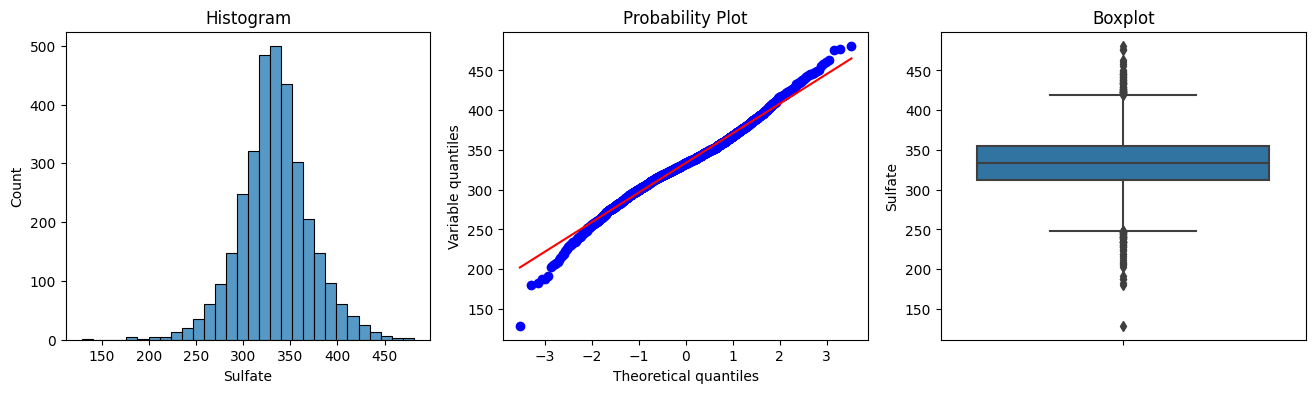


 after


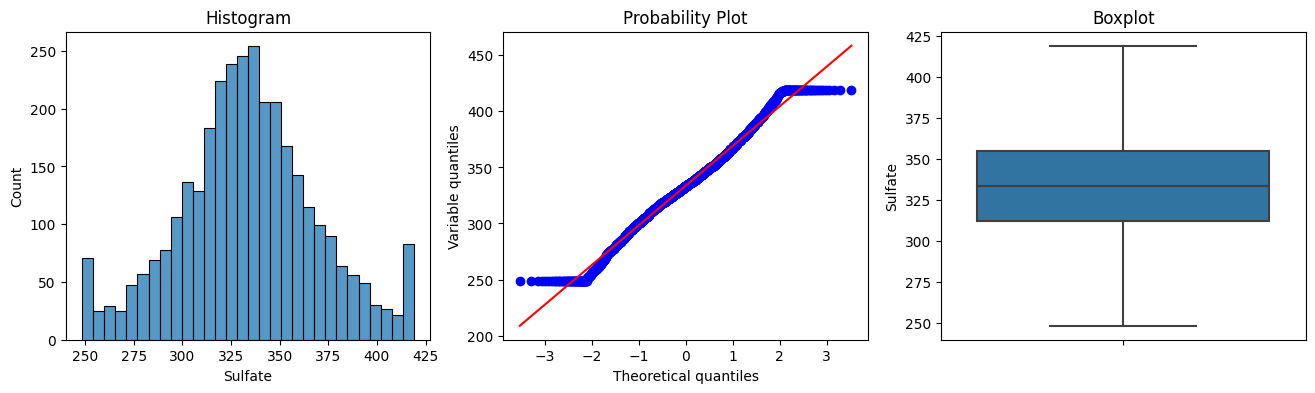

Column_Name: Conductivity

 before


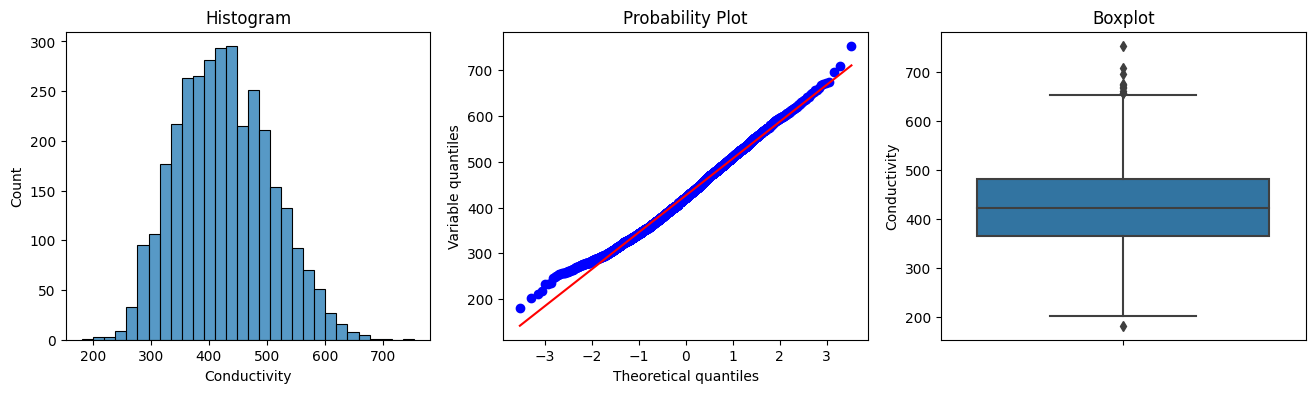


 after


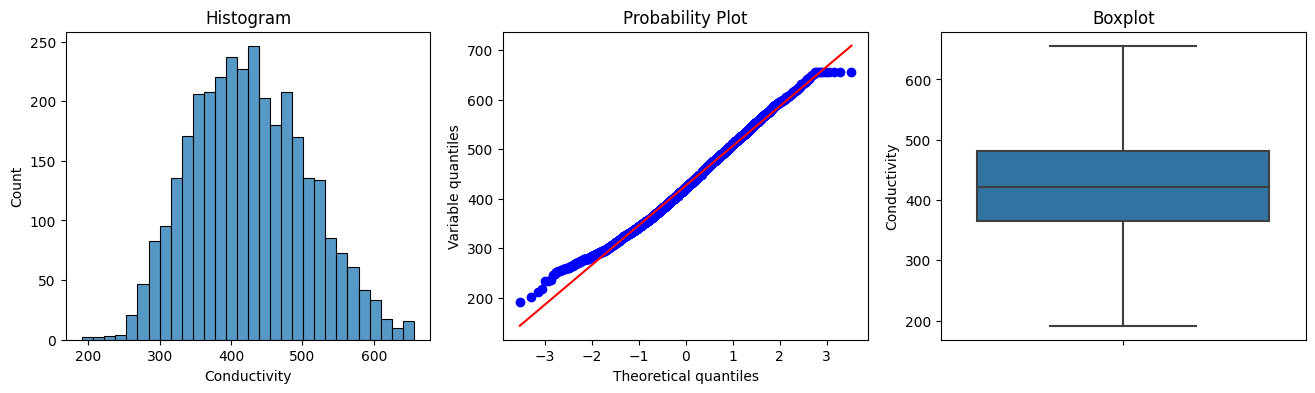

Column_Name: Organic_carbon

 before


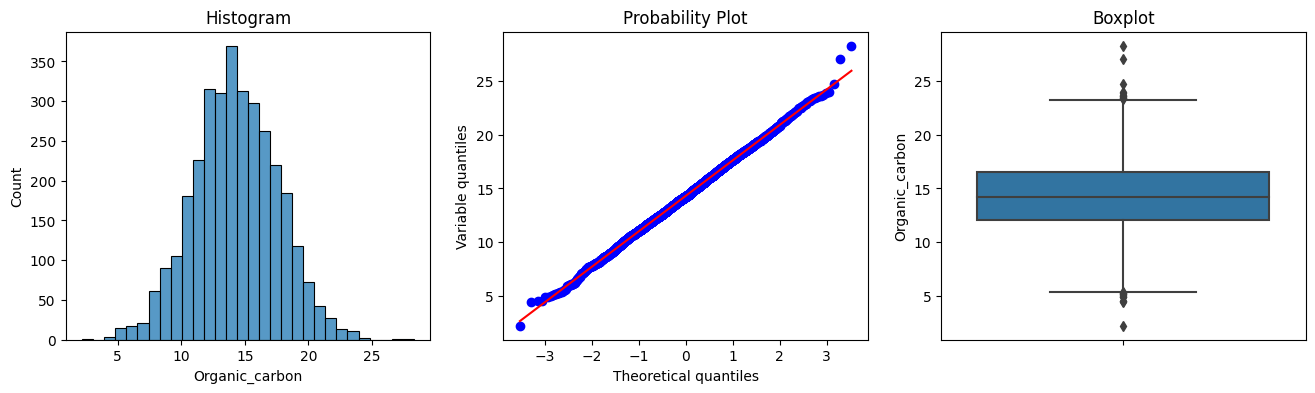


 after


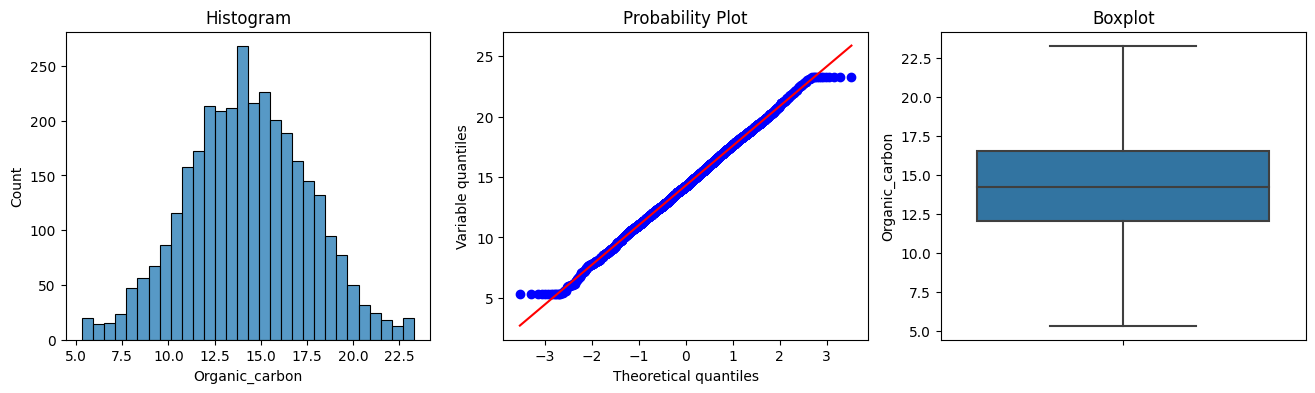

Column_Name: Trihalomethanes

 before


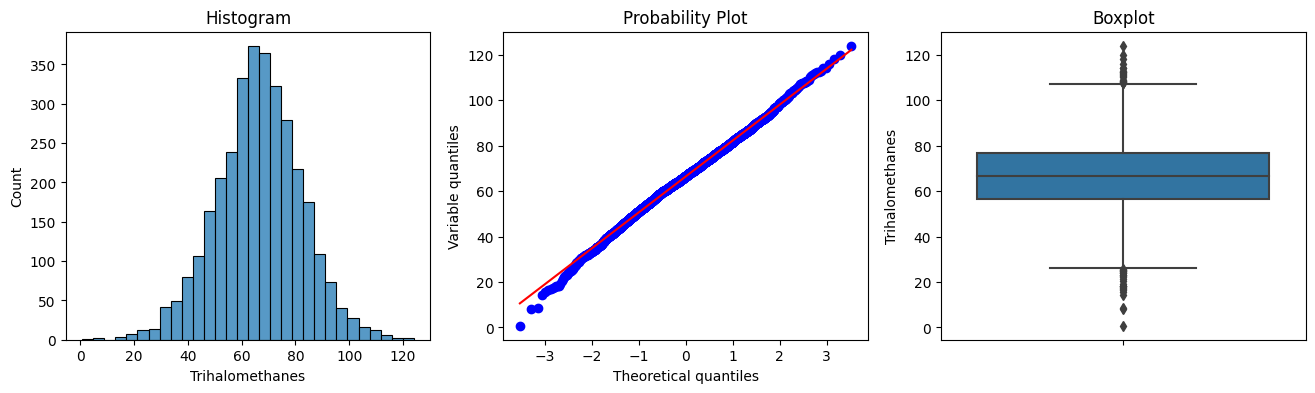


 after


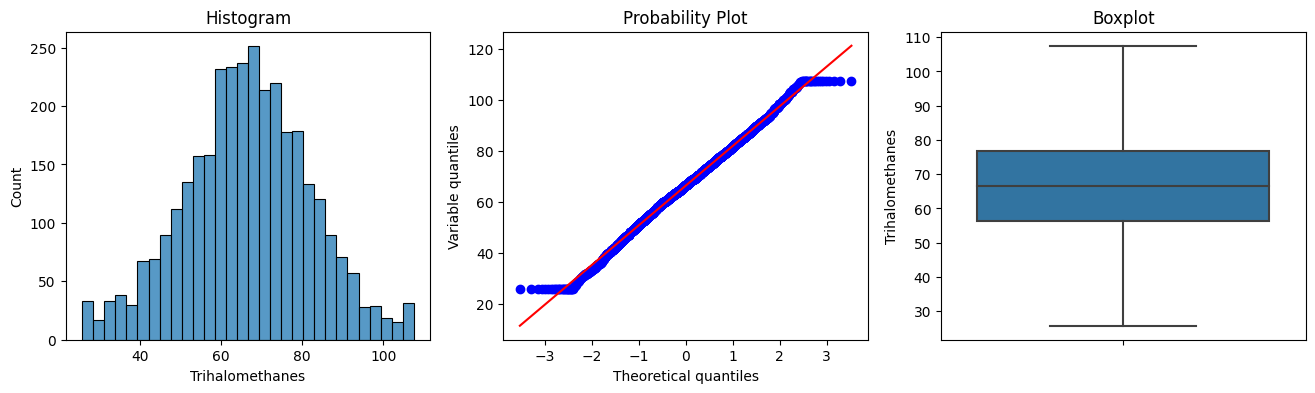

Column_Name: Turbidity

 before


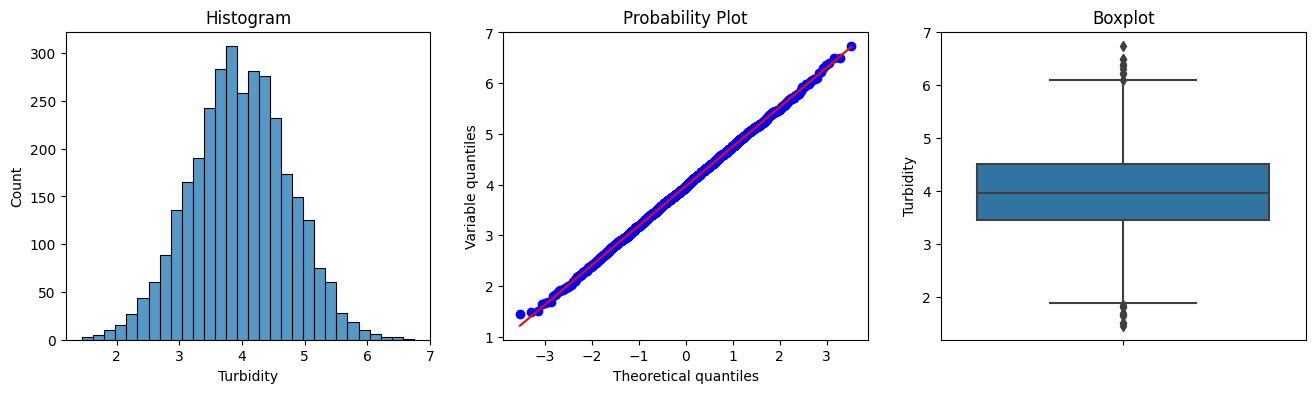


 after


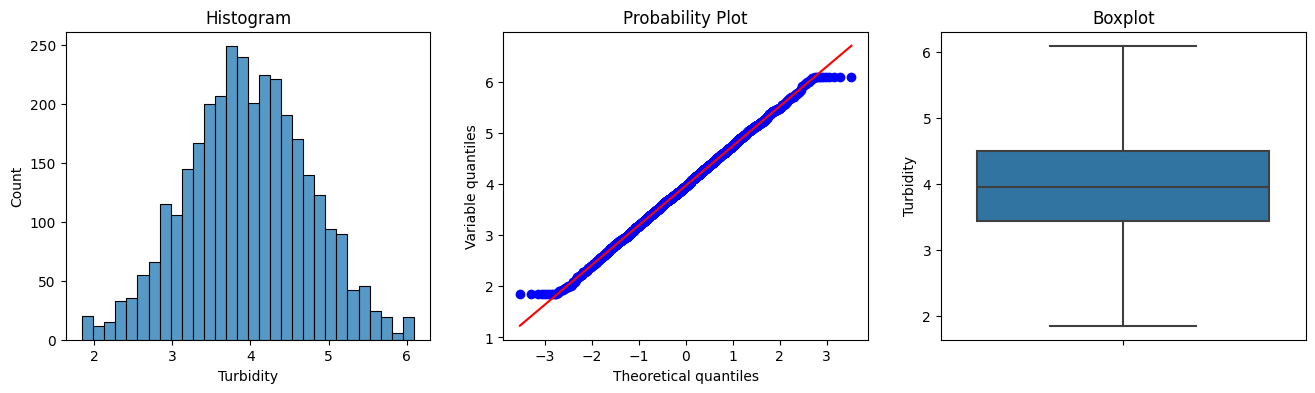

In [46]:
windsoriser = outliers.Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=cols)

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)

for col in cols:
    print("Column_Name:",col)
    print('\n before')
    diagnostic_plots(dataimpu, col)
    print('\n after')
    diagnostic_plots(dataimpu_t, col)

tail=right

Column_Name: Solids

 before


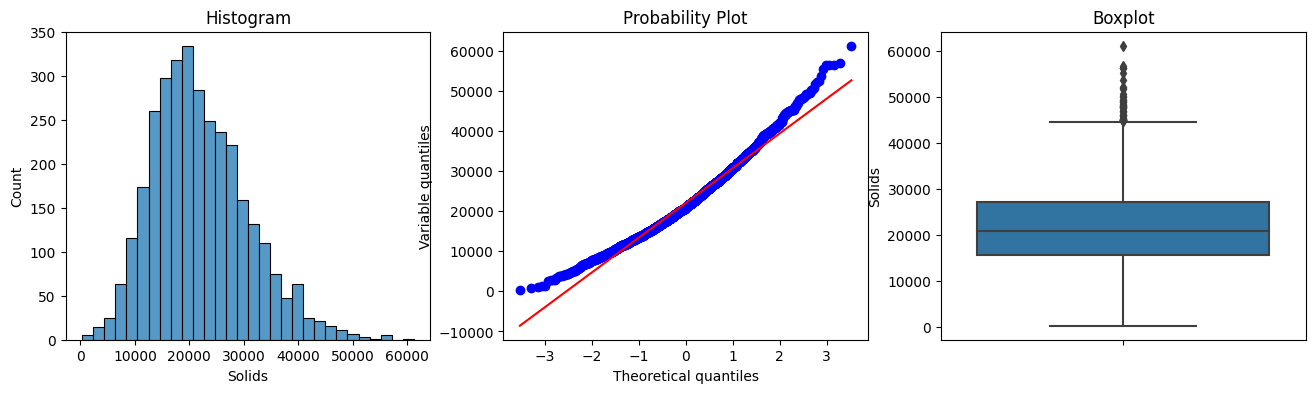


 after


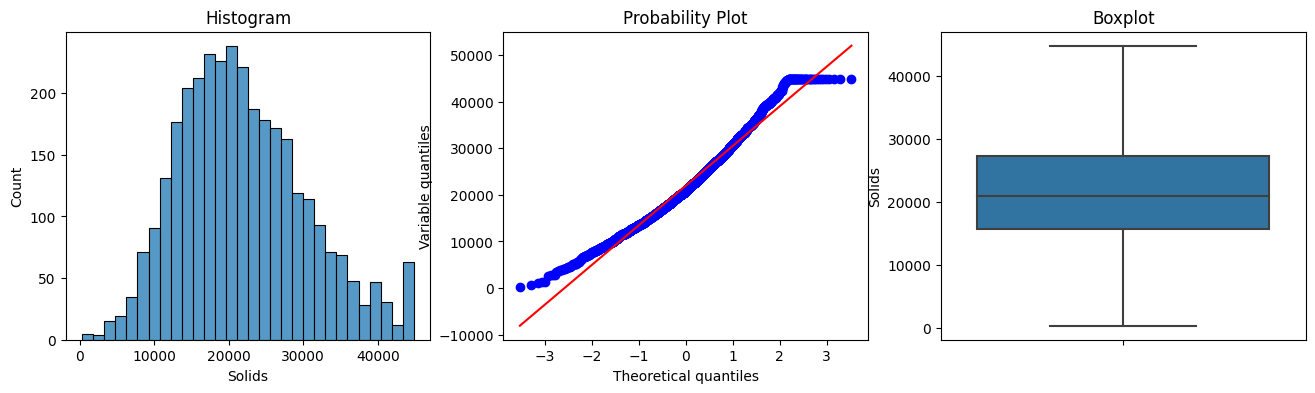

In [47]:
windsoriser = outliers.Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Solids'])

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)


print("Column_Name:",'Solids')
print('\n before')
diagnostic_plots(dataimpu, 'Solids')
print('\n after')
diagnostic_plots(dataimpu_t, 'Solids')

outliers_method=['gaussian']

Column_Name: ph

 before


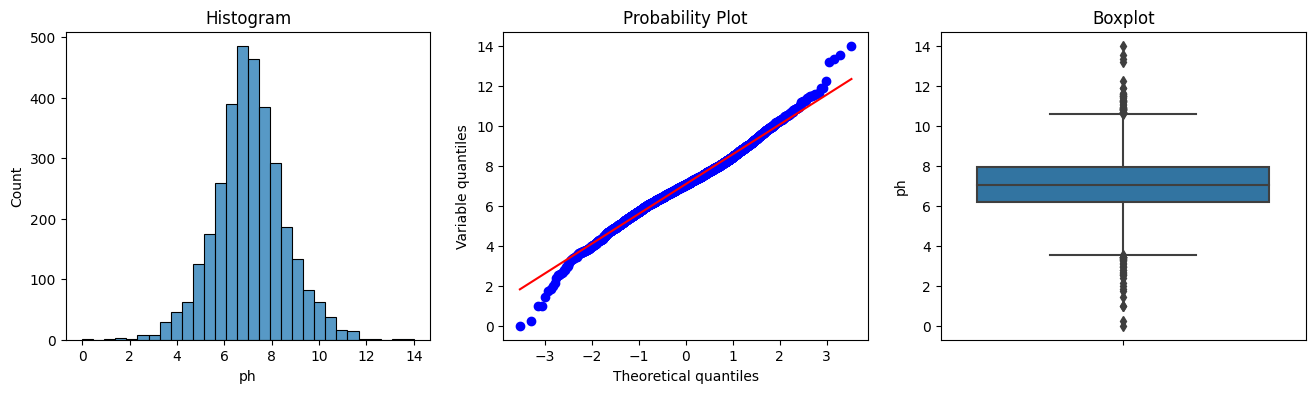


 after


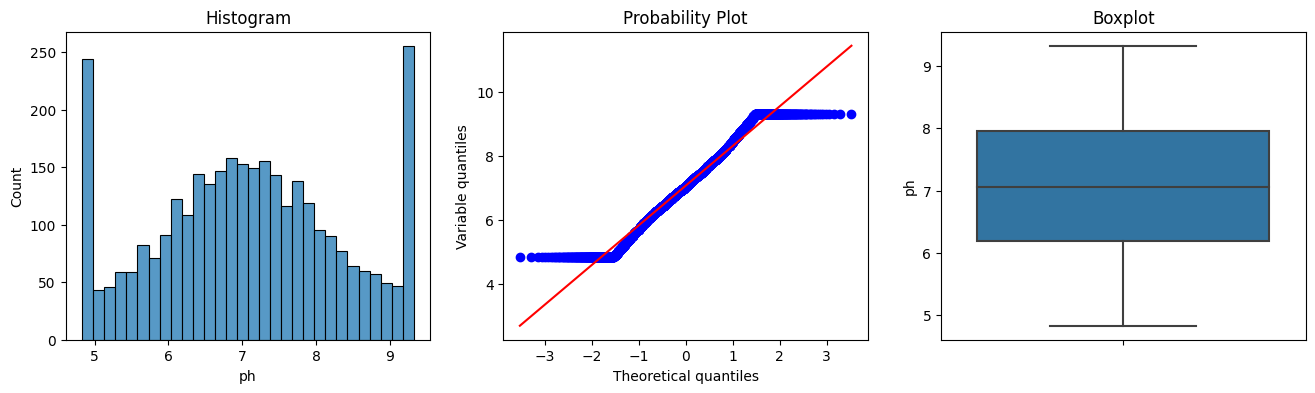

Column_Name: Hardness

 before


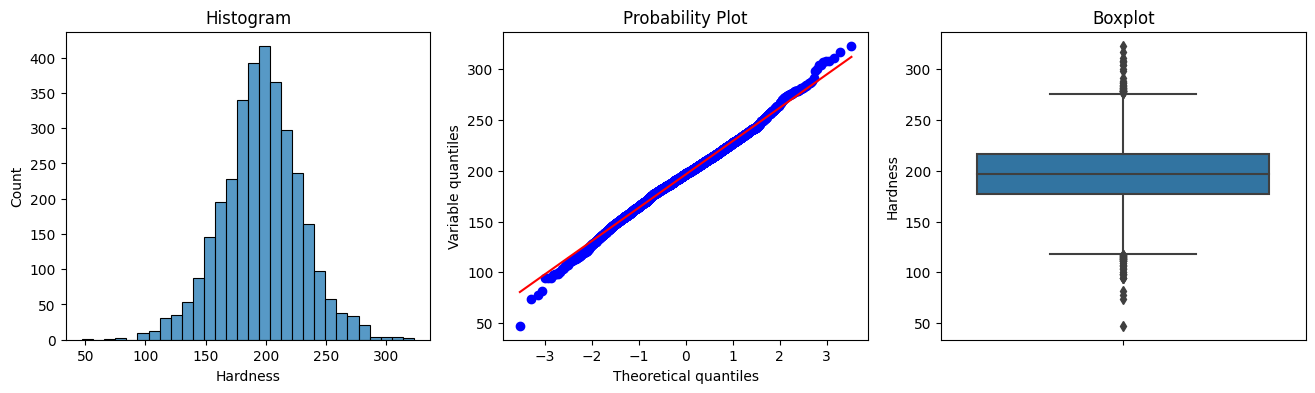


 after


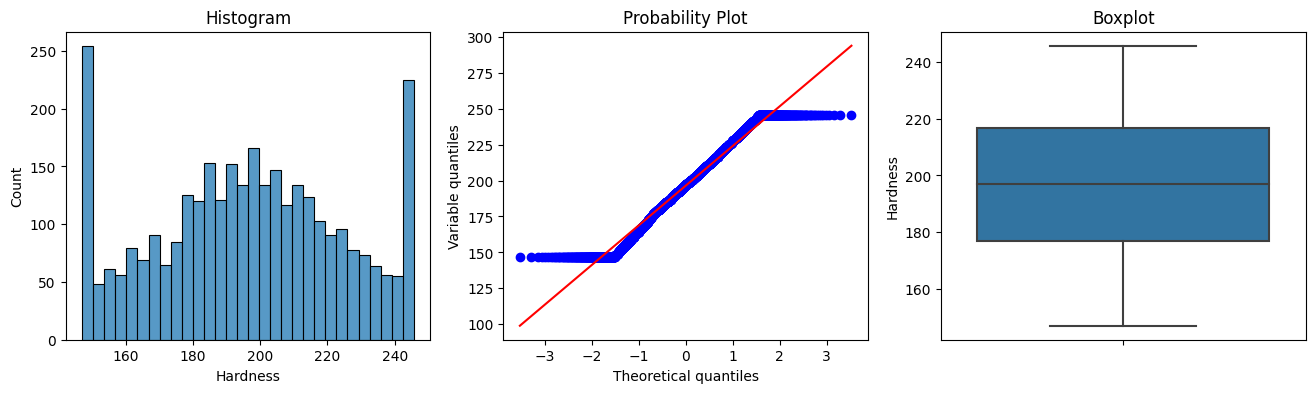

Column_Name: Chloramines

 before


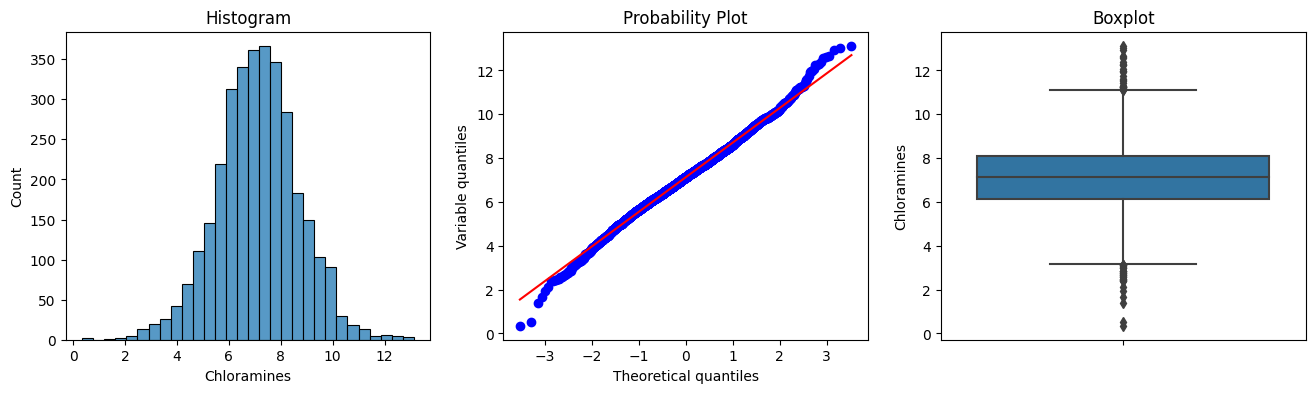


 after


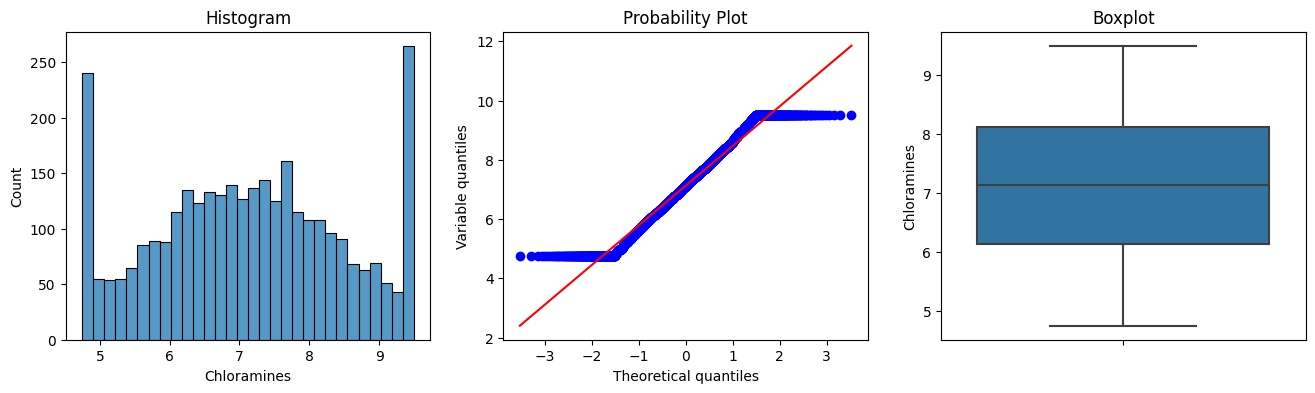

Column_Name: Sulfate

 before


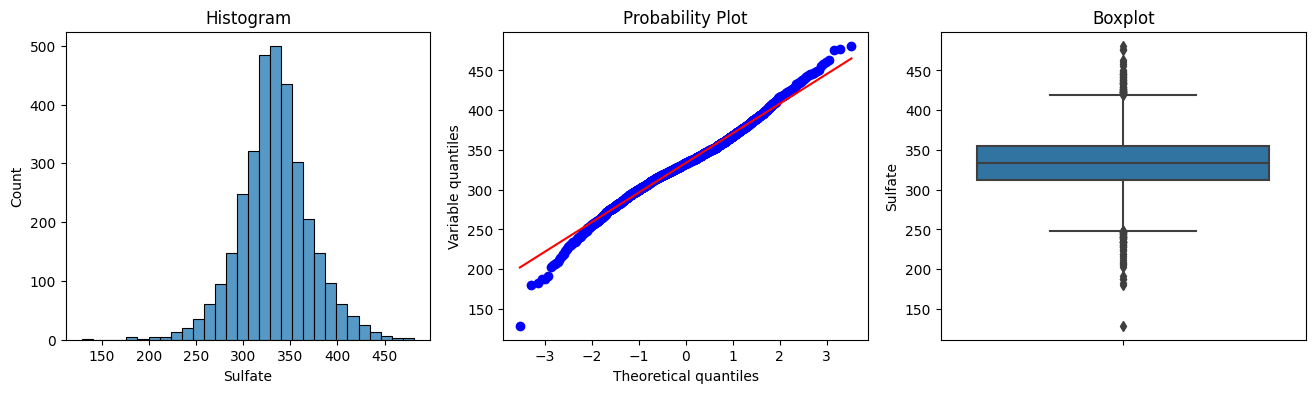


 after


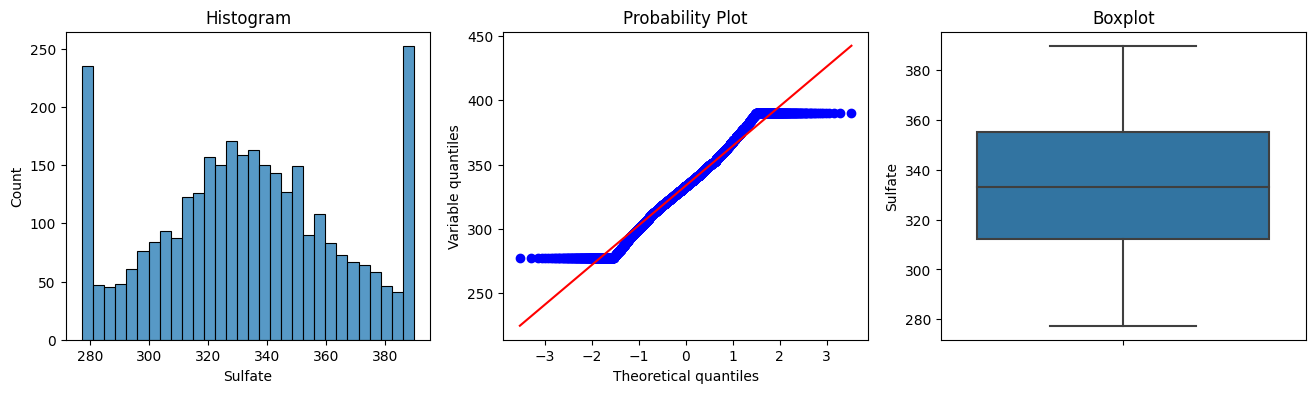

Column_Name: Conductivity

 before


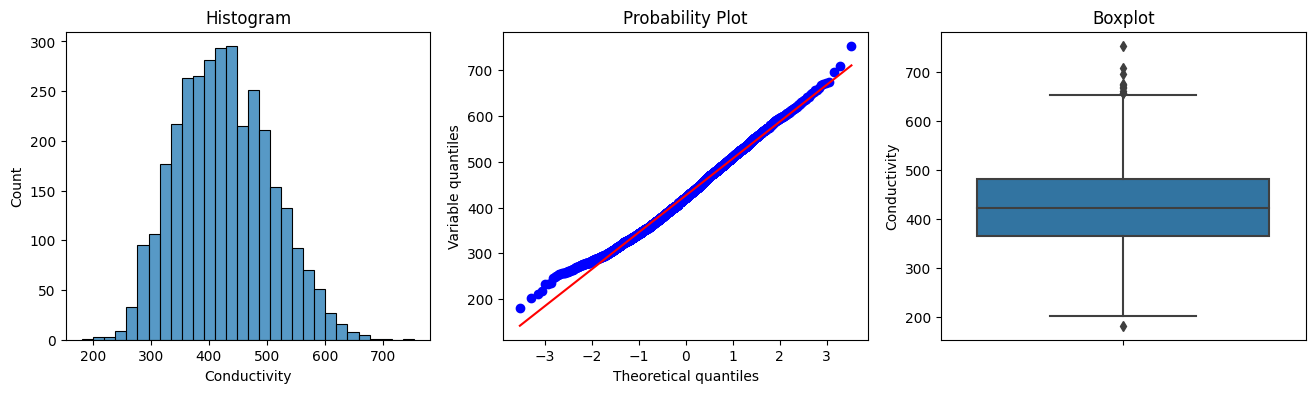


 after


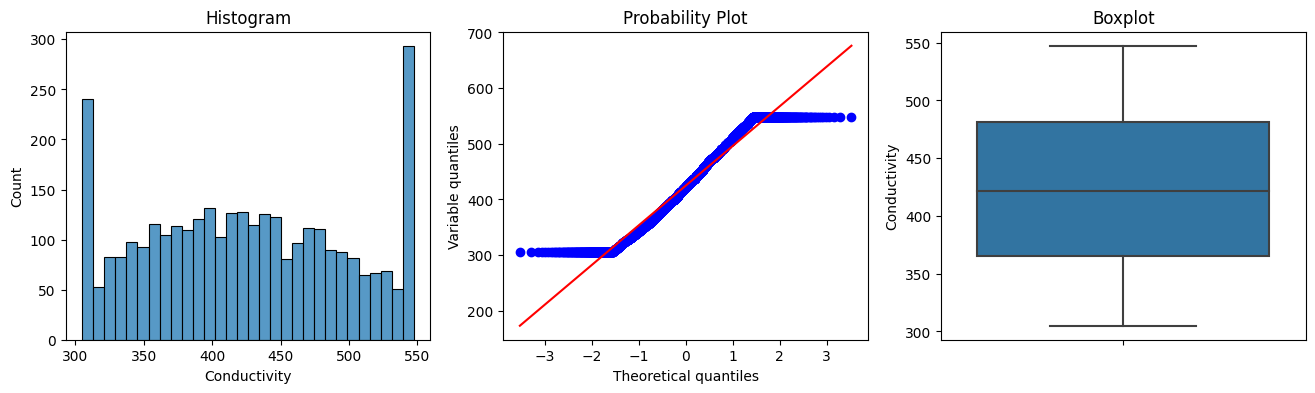

Column_Name: Organic_carbon

 before


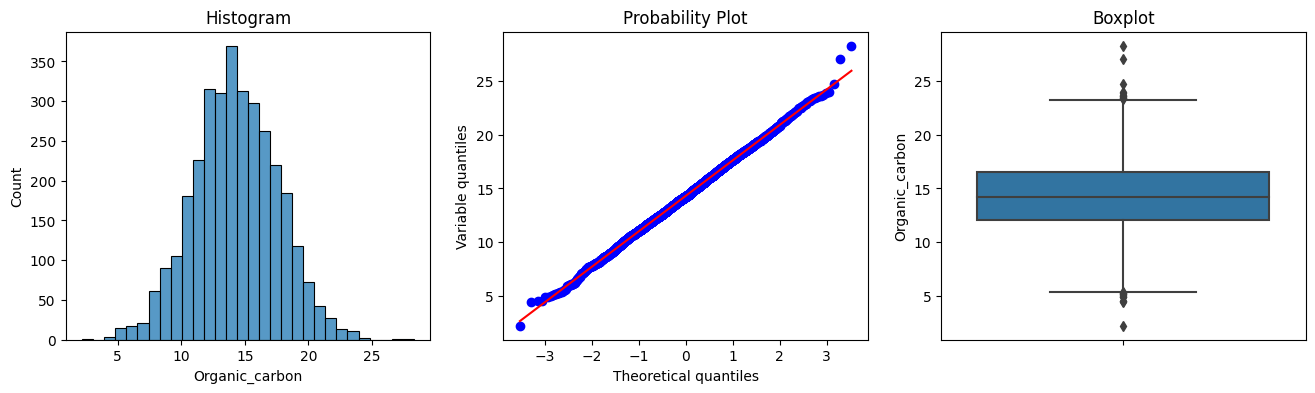


 after


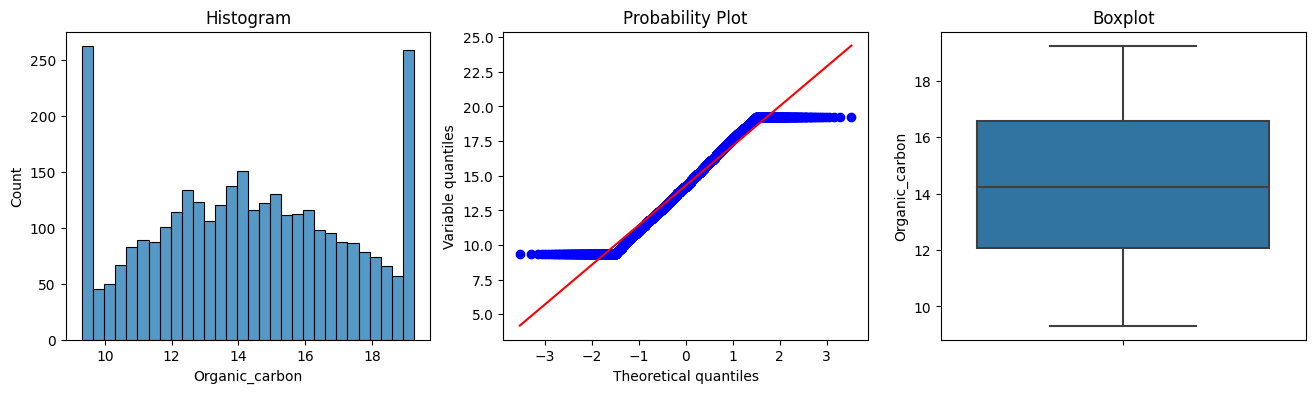

Column_Name: Trihalomethanes

 before


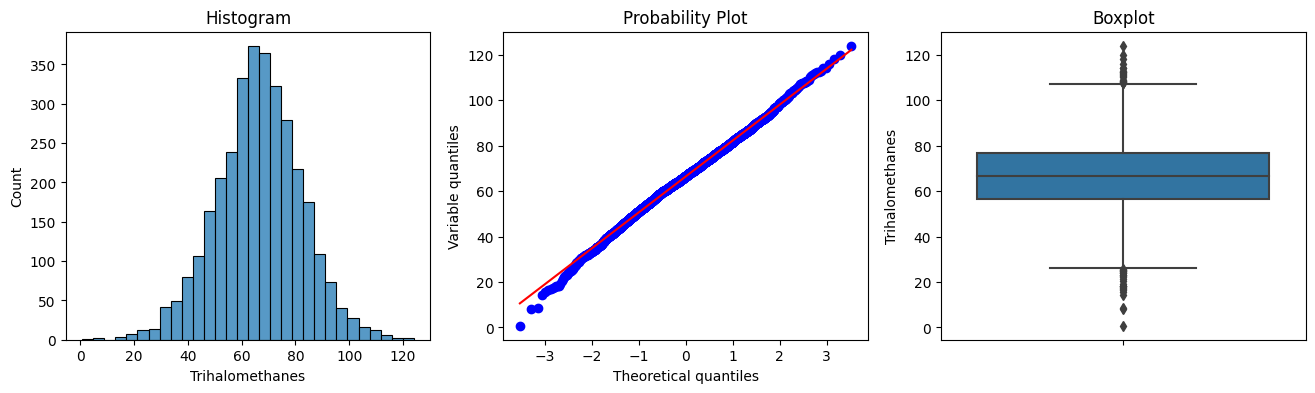


 after


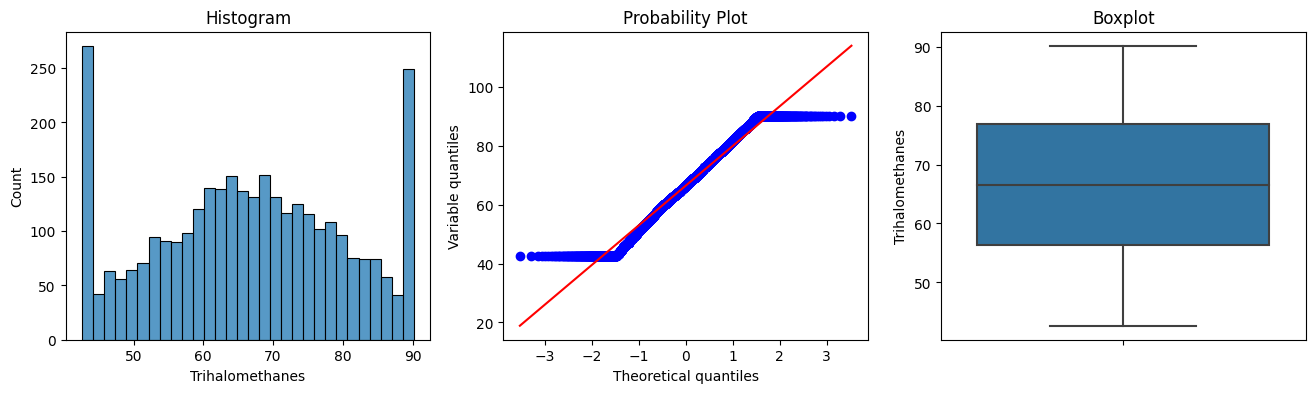

Column_Name: Turbidity

 before


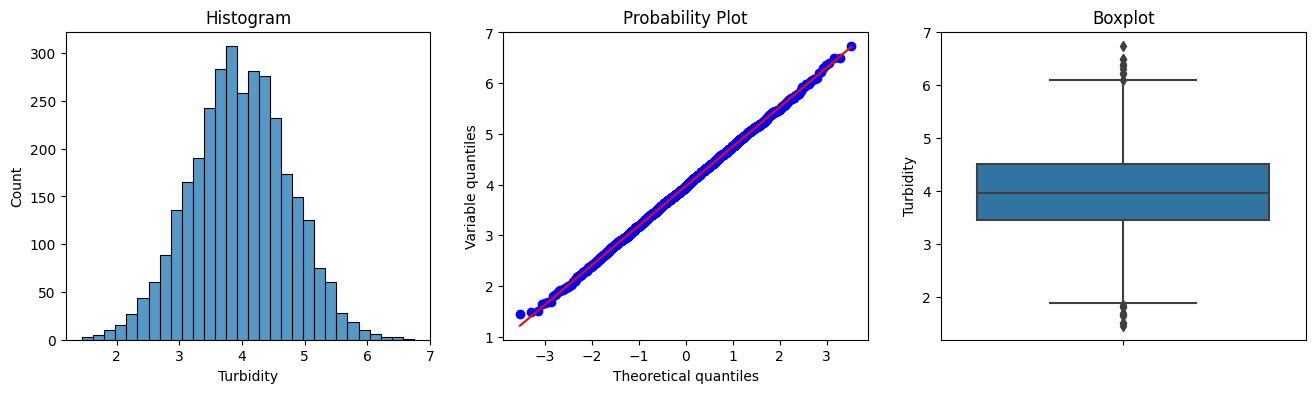


 after


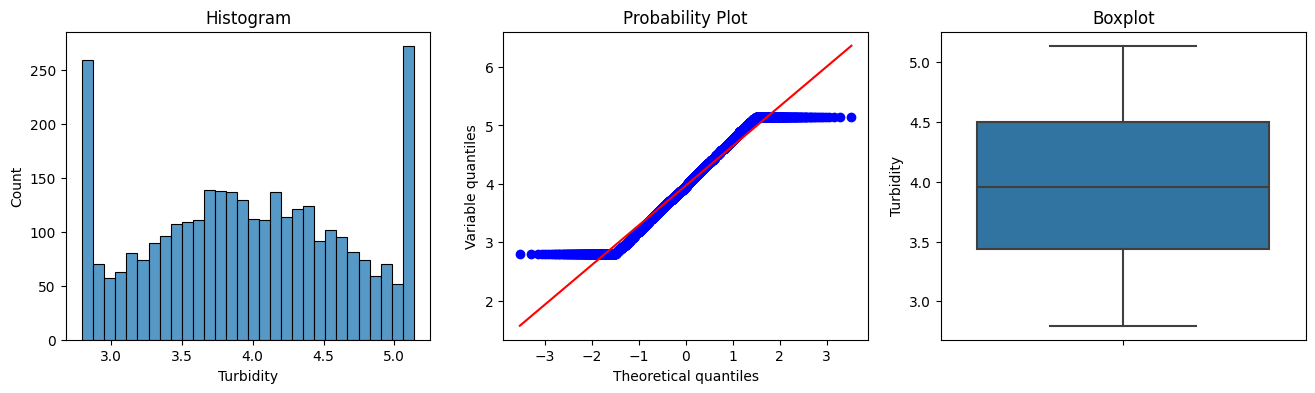

In [48]:
windsoriser = outliers.Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)

for col in ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    print("Column_Name:",col)
    print('\n before')
    diagnostic_plots(dataimpu, col)
    print('\n after')
    diagnostic_plots(dataimpu_t, col)

Column_Name: Solids

 before


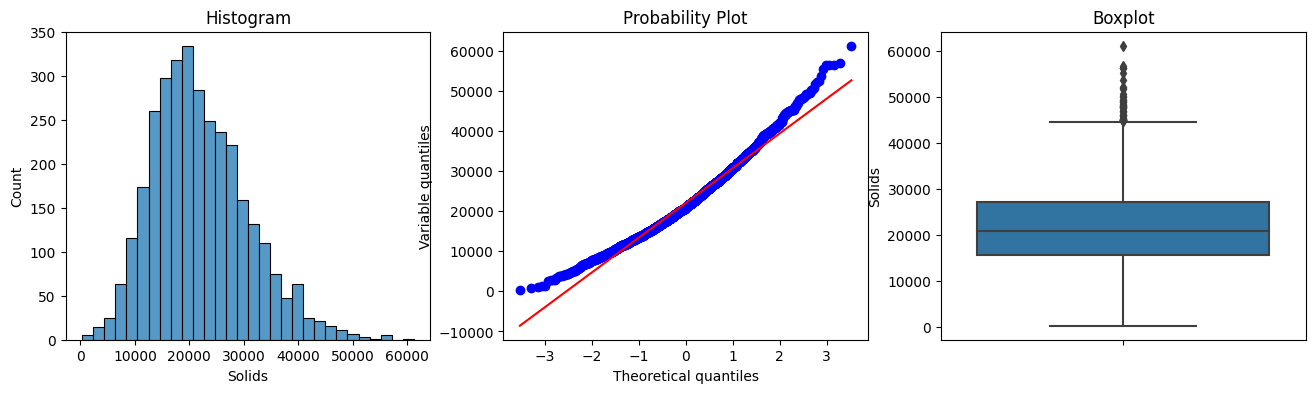


 after


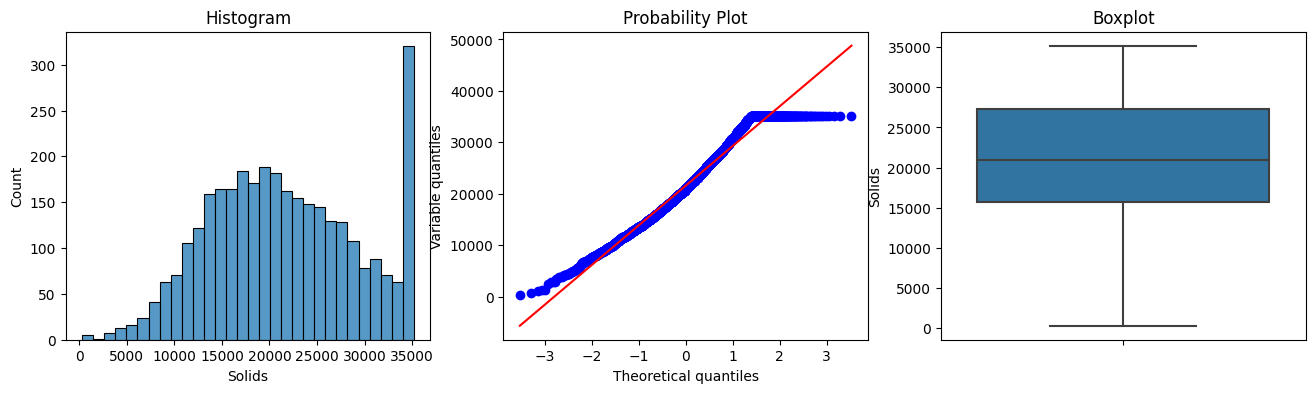

In [49]:
windsoriser = outliers.Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Solids'])

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)


print("Column_Name:",'Solids')
print('\n before')
diagnostic_plots(dataimpu, 'Solids')
print('\n after')
diagnostic_plots(dataimpu_t, 'Solids')

Column_Name: ph

 before


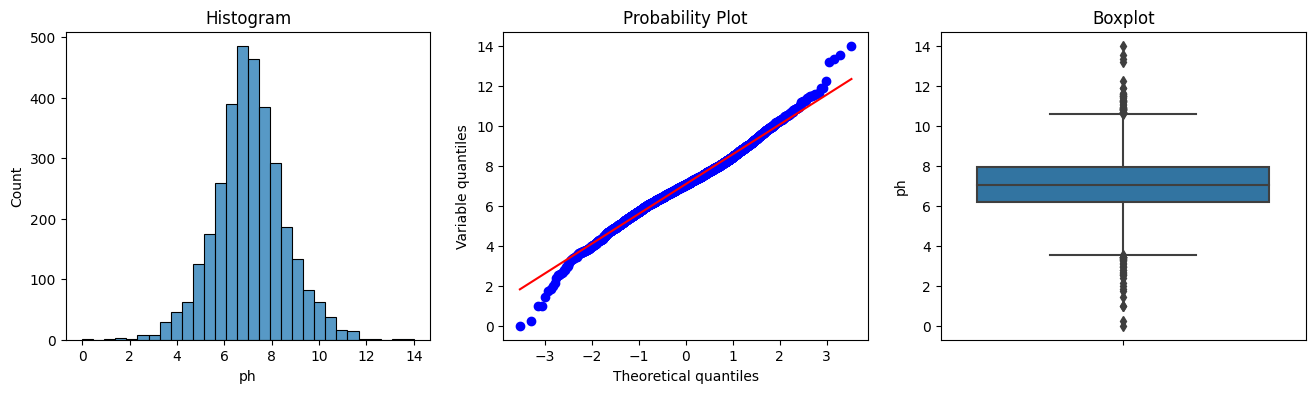


 after


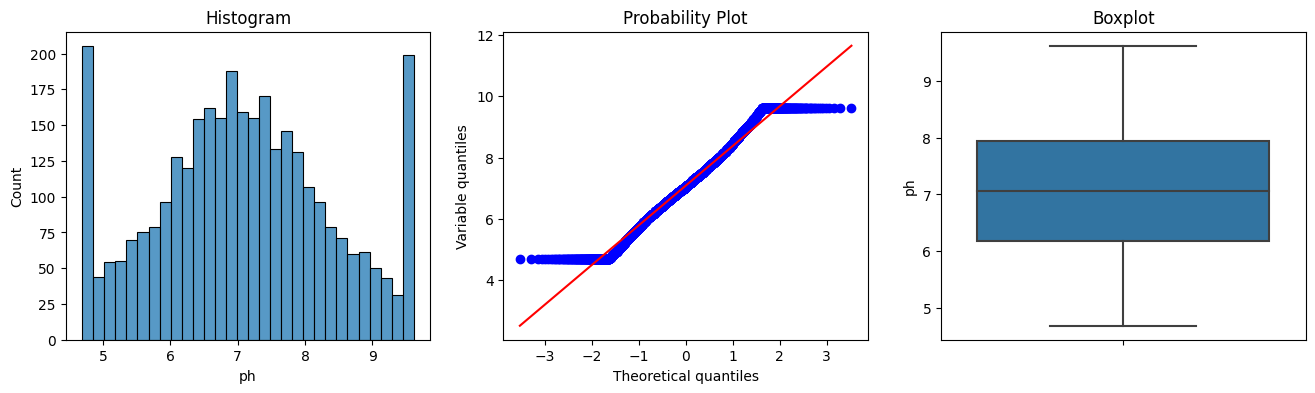

Column_Name: Hardness

 before


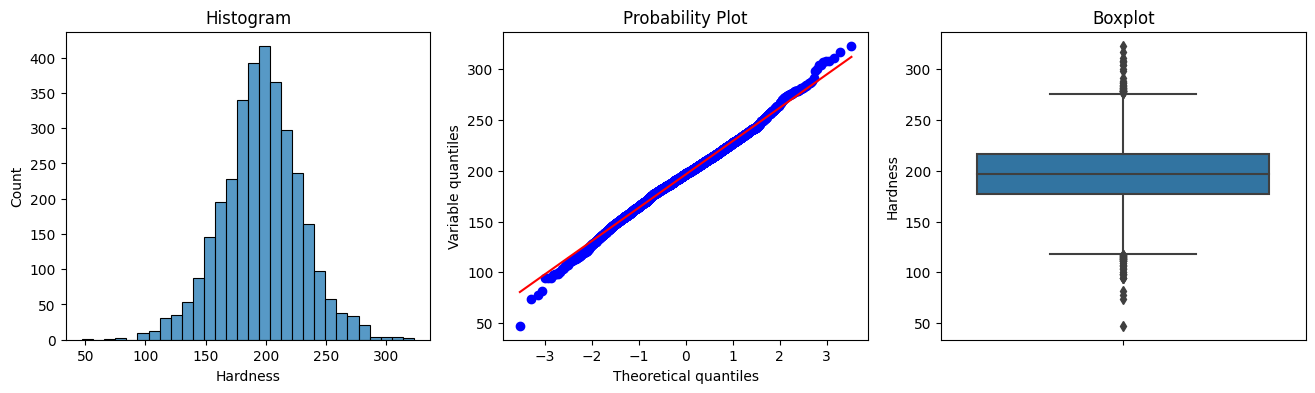


 after


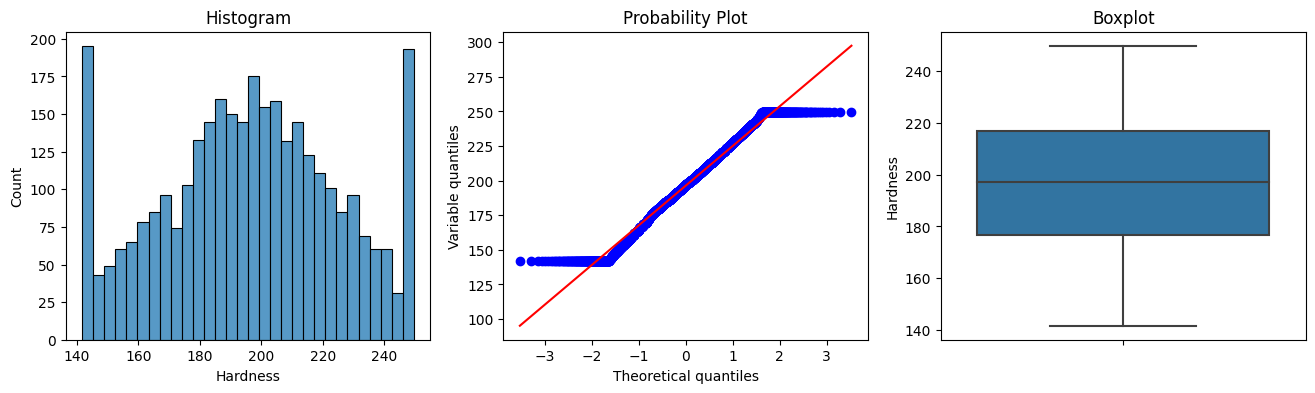

Column_Name: Chloramines

 before


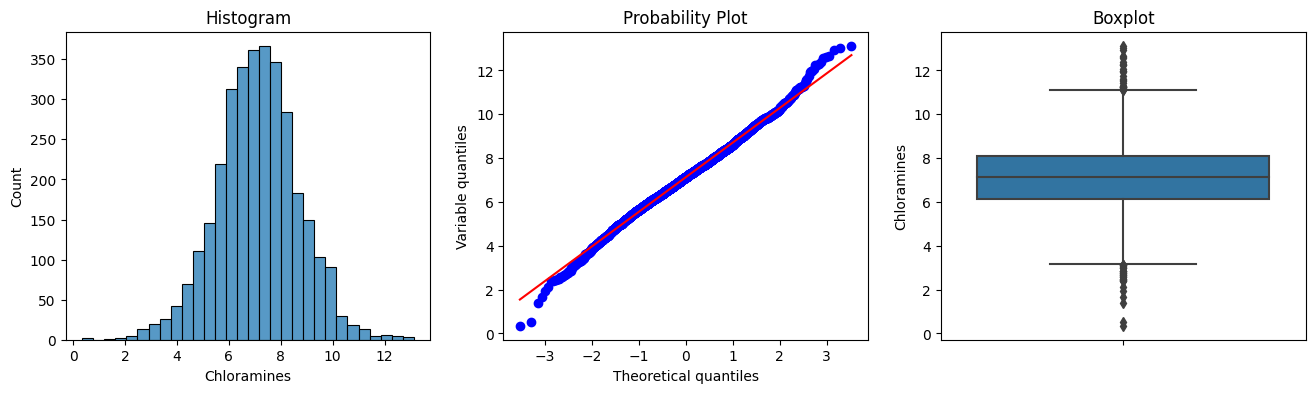


 after


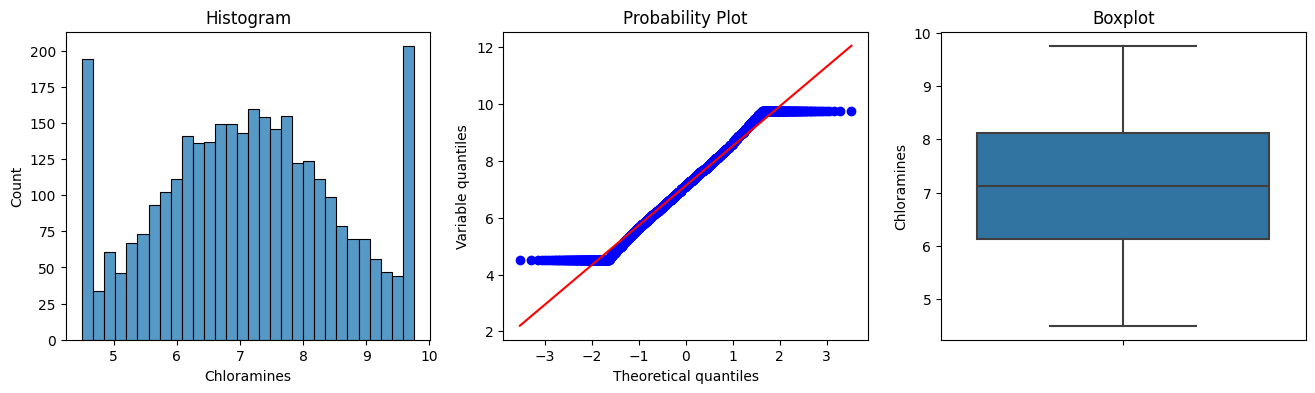

Column_Name: Sulfate

 before


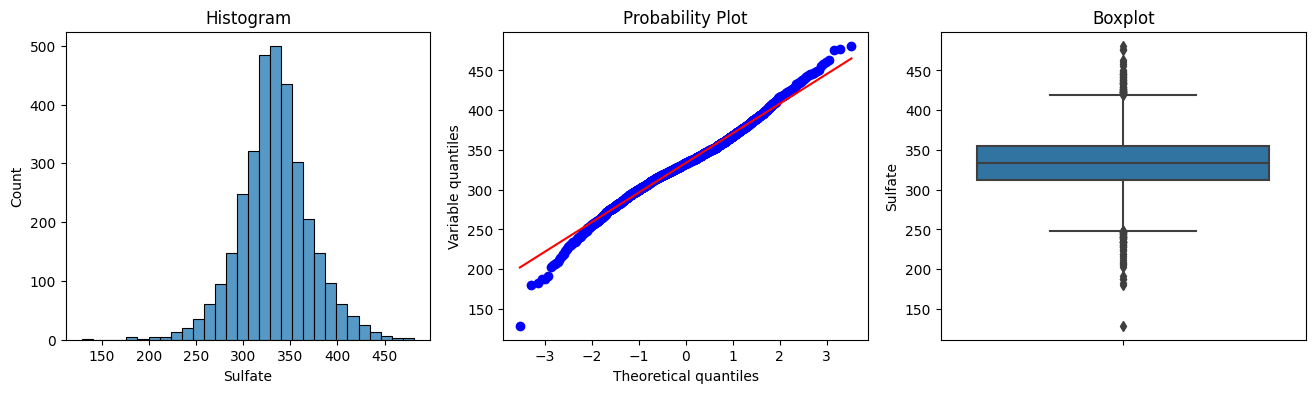


 after


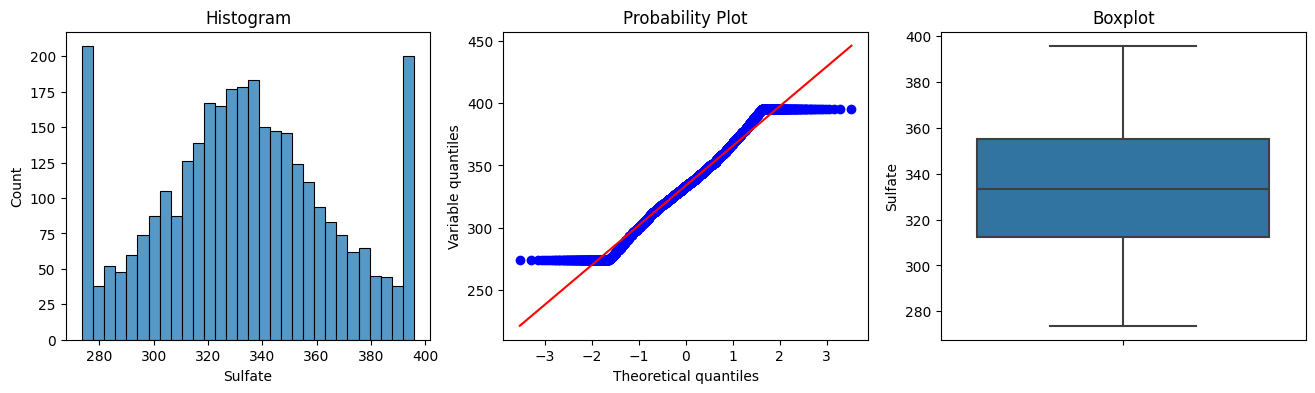

Column_Name: Conductivity

 before


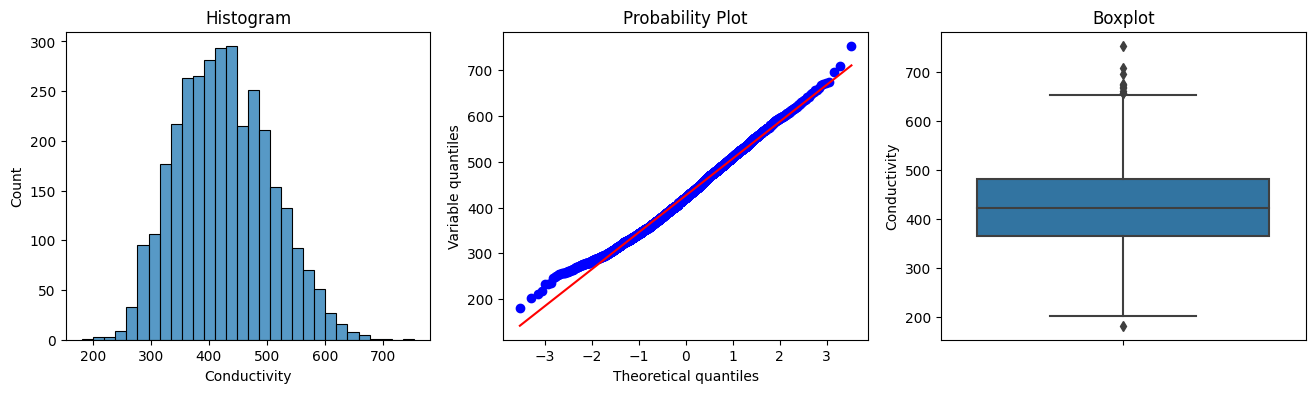


 after


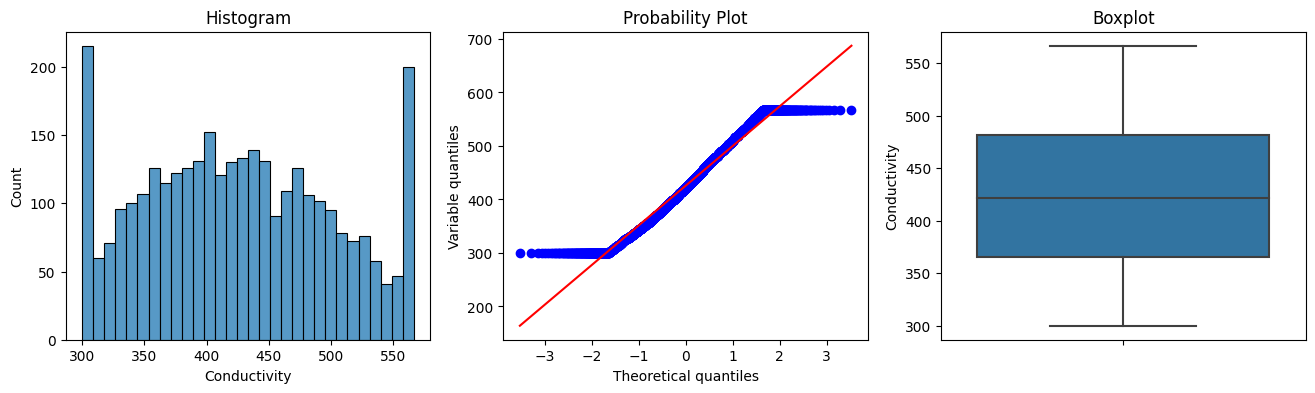

Column_Name: Organic_carbon

 before


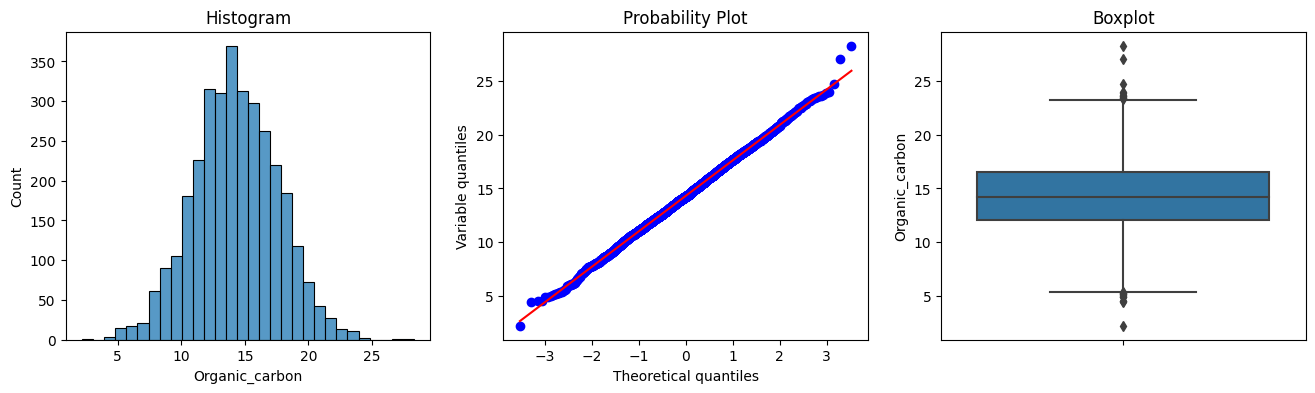


 after


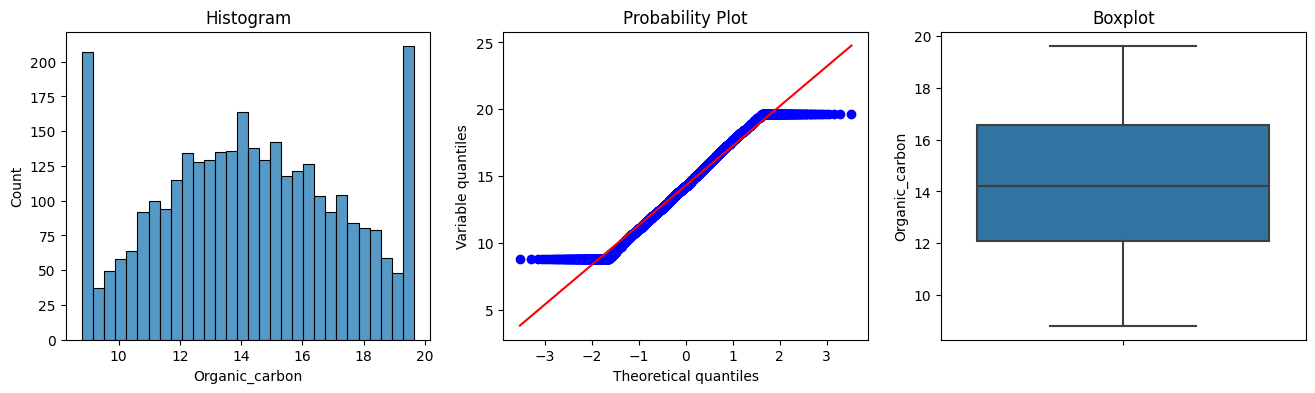

Column_Name: Trihalomethanes

 before


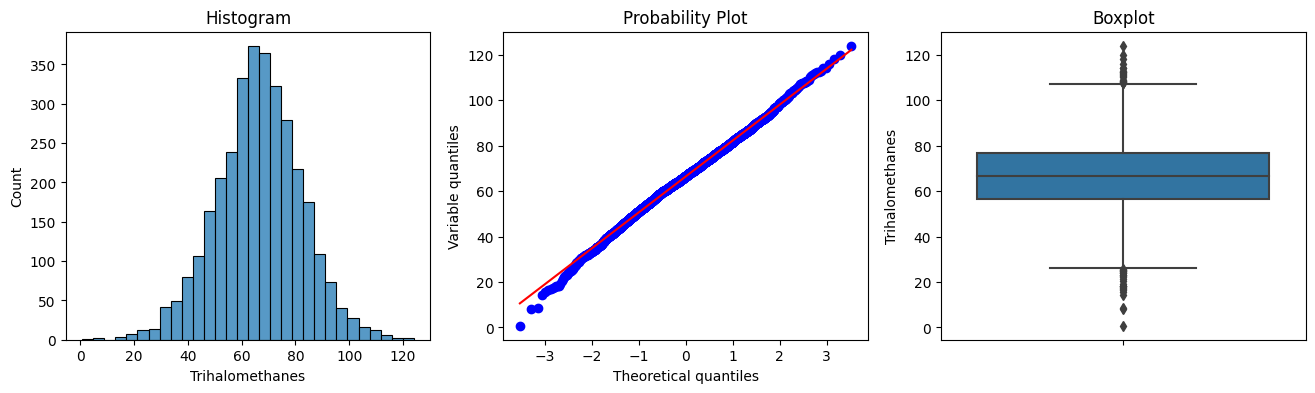


 after


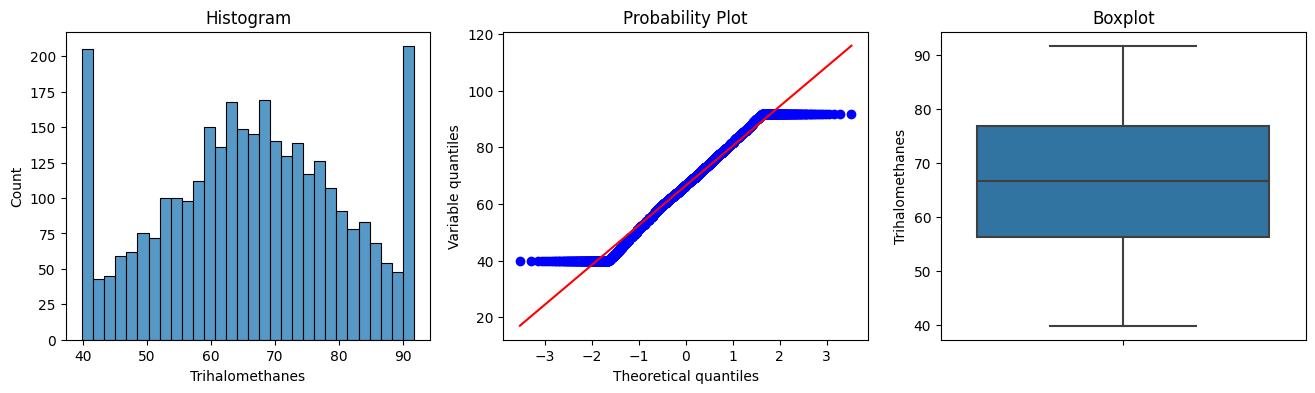

Column_Name: Turbidity

 before


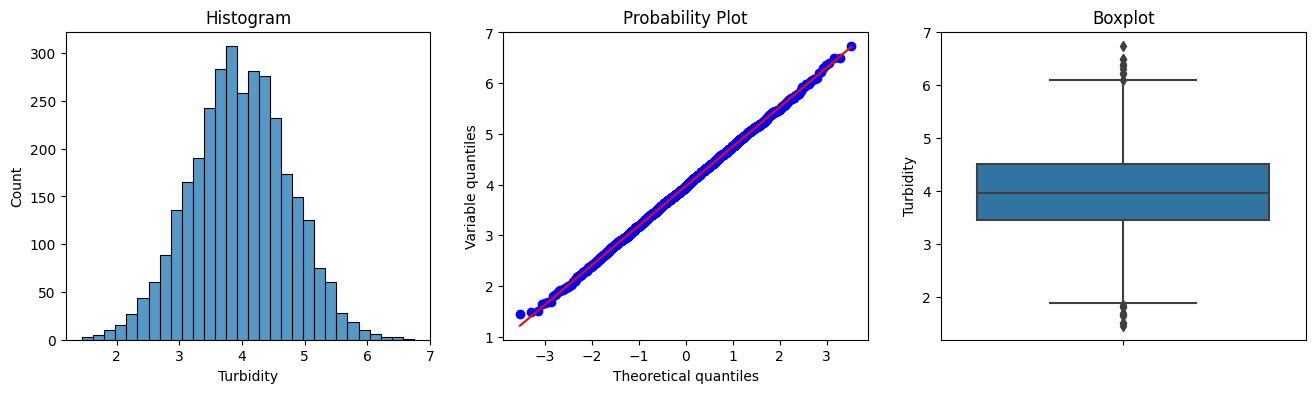


 after


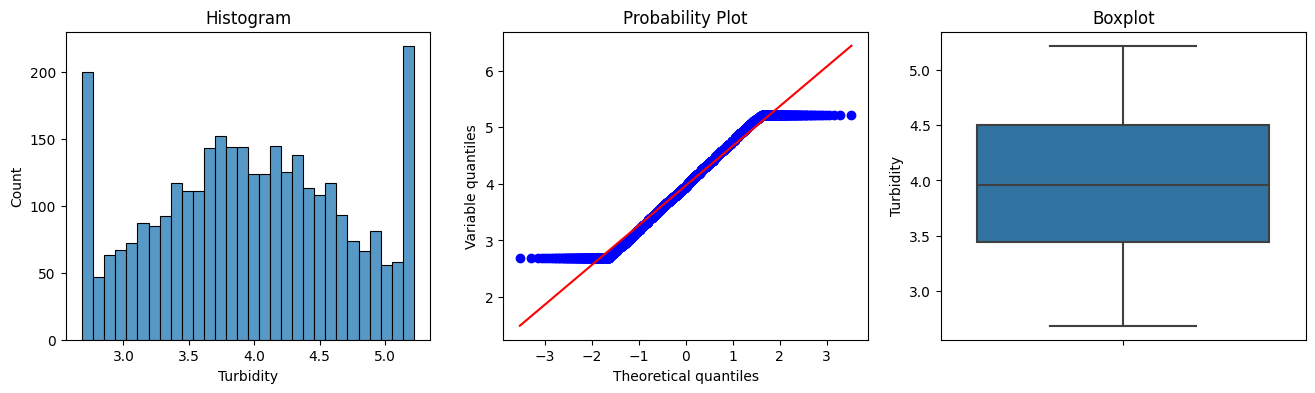

In [50]:

windsoriser = outliers.Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)

for col in ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    print("Column_Name:",col)
    print('\n before')
    diagnostic_plots(dataimpu, col)
    print('\n after')
    diagnostic_plots(dataimpu_t, col)

Column_Name: Solids

 before


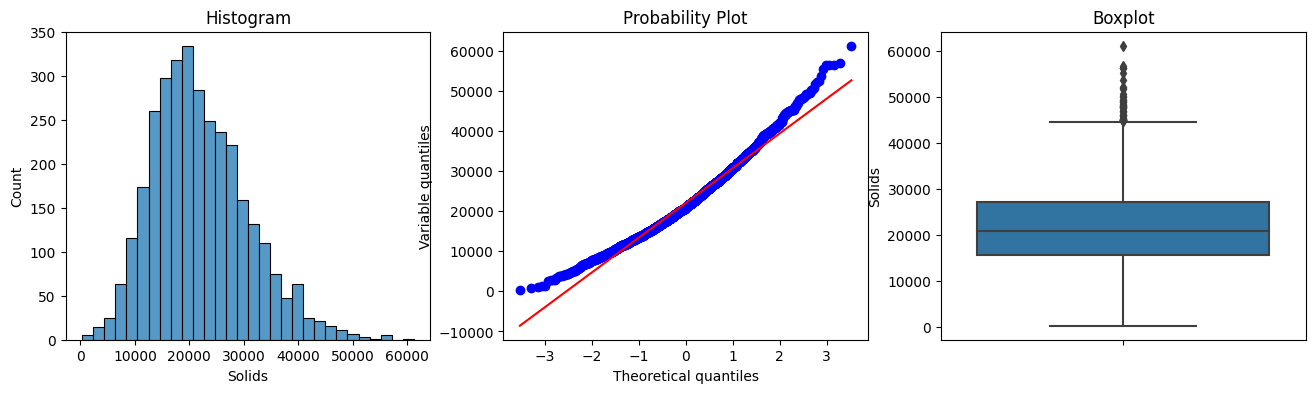


 after


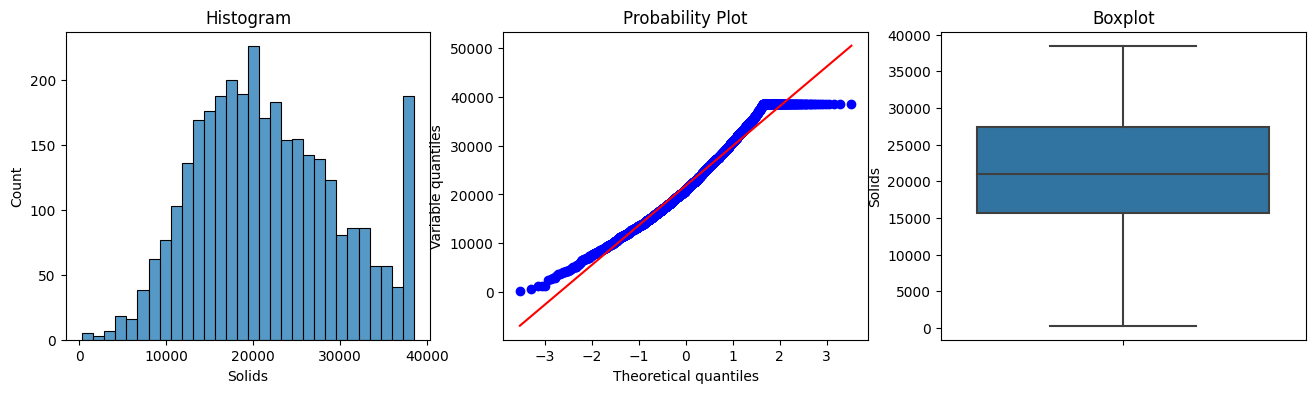

In [51]:
windsoriser = outliers.Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=0.05,
                          variables=['Solids'])

windsoriser.fit(dataimpu)
dataimpu_t = windsoriser.transform(dataimpu)


print("Column_Name:",'Solids')
print('\n before')
diagnostic_plots(dataimpu, 'Solids')
print('\n after')
diagnostic_plots(dataimpu_t, 'Solids')

scalier

In [52]:
for scalier in [StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()]:
    scalier.fit(dataimpu)
    dataimpu_s = scalier.transform(dataimpu)
    dataimpu_s=pd.DataFrame(dataimpu_s,columns=cols)
    print("SCALIER_METHOD: ",scalier)
    print(dataimpu_s.describe().T)

SCALIER_METHOD:  StandardScaler()
                  count          mean       std       min       25%       50%  \
ph               3276.0 -1.849016e-16  1.000153 -4.728360 -0.595270 -0.017291   
Hardness         3276.0  1.024821e-15  1.000153 -4.530454 -0.593737  0.018194   
Solids           3276.0 -4.012528e-17  1.000153 -2.474344 -0.723992 -0.123900   
Chloramines      3276.0  5.205441e-16  1.000153 -4.277288 -0.628525  0.005068   
Sulfate          3276.0 -1.565970e-15  1.000153 -5.463113 -0.566835 -0.009038   
Conductivity     3276.0  1.708035e-16  1.000153 -3.028290 -0.748291 -0.053459   
Organic_carbon   3276.0  2.385827e-17  1.000153 -3.653635 -0.670919 -0.020145   
Trihalomethanes  3276.0  2.168934e-18  1.000153 -4.146934 -0.631216  0.013035   
Turbidity        3276.0  5.487403e-16  1.000153 -3.225560 -0.675510 -0.015070   

                      75%       max  
ph               0.581494  4.624008  
Hardness         0.617433  3.855680  
Solids           0.606653  4.472689  
Chl

In [53]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=.3,stratify=target,random_state=123)

In [54]:
X_train.shape, X_test.shape

((2293, 9), (983, 9))

LOGISTIC REGRESSOIN

In [55]:

Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('lg',LogisticRegression())])
pip.fit(X_train,y_train)


Pipeline(steps=[('preprocess_custom',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('missing_impute',
                                                                   KNNImputer())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Turbidity'])])),
                ('lg', LogisticRegression())])

In [56]:
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))

print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 0.6101177496729175
Test set
accuracy: 0.6103763987792472


In [57]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, cols)
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('lg',LogisticRegression())])
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print(v_outlier)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer(tail='both')
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472


In [58]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('lg',LogisticRegression())])
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print(v_outlier)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer(tail='both')
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472


In [59]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='right',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='right',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3))
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('lg',LogisticRegression())])
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print(v_outlier)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr')
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer()
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Winsorizer(capping_method='quantiles', fold=0.05)
Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472


###### discretization

In [63]:

#experiment=  'all ' + outliers_method[i] +' outlier' 
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',Binning())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('lg',LogisticRegression())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6113936927772126


In [52]:
scaling_method=['StandardScaler','RobustScaler','MinMaxScaler','Normalizer','MaxAbsScaler']
i=0
for v_scaling in [StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3)),
        ('scaling',v_scaling)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='right',fold=3)),
        ('scaling',v_scaling)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('lg',LogisticRegression())])
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print(v_scaling)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

StandardScaler()
Train set accuracy: 0.610989969472307
Test set accuracy: 0.612410986775178
RobustScaler()
Train set accuracy: 0.610989969472307
Test set accuracy: 0.612410986775178
MinMaxScaler()
Train set accuracy: 0.6101177496729175
Test set accuracy: 0.6103763987792472
Normalizer()
Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472
MaxAbsScaler()
Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472


In [64]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3)),
    ('scaling',StandardScaler())
])

solid_Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='right',fold=3)),
    ('scaling',StandardScaler())
    ])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
        ('Solids_impute', solid_Imputer, ['Solids']),
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('lg',LogisticRegression())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 0.610989969472307
Test set accuracy: 0.612410986775178


NAIVEBASE

In [54]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('NB',GaussianNB())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 0.6175316179677278
Test set
accuracy: 0.6449643947100712


In [55]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, cols)
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('NB',GaussianNB())])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.6179677278674226
Test set accuracy: 0.6439471007121058
Winsorizer(tail='both')
Train set accuracy: 0.6170955080680331
Test set accuracy: 0.6388606307222787
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 0.6162232882686437
Test set accuracy: 0.6347914547304171


In [56]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('NB',GaussianNB())])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.6179677278674226
Test set accuracy: 0.6459816887080366
Winsorizer(tail='both')
Train set accuracy: 0.618839947666812
Test set accuracy: 0.6439471007121058
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 0.6127344090710859
Test set accuracy: 0.6337741607324516


In [57]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='right',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='right',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3))
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('NB',GaussianNB())])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr')
Train set accuracy: 0.6179677278674226
Test set accuracy: 0.6459816887080366
Winsorizer()
Train set accuracy: 0.6192760575665067
Test set accuracy: 0.6449643947100712
Winsorizer(capping_method='quantiles', fold=0.05)
Train set accuracy: 0.6192760575665067
Test set accuracy: 0.646998982706002


###### discretization

In [65]:

#experiment=  'all ' + outliers_method[i] +' outlier' 
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',Binning())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('NB',GaussianNB())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 0.6218927169646751
Test set accuracy: 0.6358087487283826


In [58]:
scaling_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_scaling in [StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3)),
        ('scaling',v_scaling)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05)),
        ('scaling',v_scaling)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('NB',GaussianNB())])
    print(v_scaling)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))
    

StandardScaler()
Train set accuracy: 0.6197121674662015
Test set accuracy: 0.646998982706002
RobustScaler()
Train set accuracy: 0.6197121674662015
Test set accuracy: 0.646998982706002
MinMaxScaler()
Train set accuracy: 0.6197121674662015
Test set accuracy: 0.646998982706002
Normalizer()
Train set accuracy: 0.6175316179677278
Test set accuracy: 0.6205493387589013
MaxAbsScaler()
Train set accuracy: 0.6197121674662015
Test set accuracy: 0.646998982706002


In [67]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3))
])

solid_Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05))
    ])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
        ('Solids_impute', solid_Imputer, ['Solids']),
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('NB',GaussianNB())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))


Train set accuracy: 0.6192760575665067
Test set accuracy: 0.646998982706002


RandomForest

In [60]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',RandomForestClassifier(max_depth=7,random_state=123))])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 0.7335368512865242
Test set
accuracy: 0.6642929806714141


In [61]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, cols)
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('RF',RandomForestClassifier(random_state=123))])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6754832146490336
Winsorizer(tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6622583926754833
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6490335707019329


In [62]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('RF',RandomForestClassifier(random_state=123))])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524
Winsorizer(tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6581892166836215
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6541200406917599


In [63]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='right',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='right',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer())
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('RF',RandomForestClassifier(random_state=123))])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr')
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524
Winsorizer()
Train set accuracy: 1.0
Test set accuracy: 0.6480162767039674
Winsorizer(capping_method='quantiles', fold=0.05)
Train set accuracy: 1.0
Test set accuracy: 0.6520854526958291


###### discretization

In [69]:

#experiment=  'all ' + outliers_method[i] +' outlier' 
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',Binning())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',RandomForestClassifier(random_state=123))])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 1.0
Test set accuracy: 0.669379450661241


In [64]:
scaling_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_scaling in [StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('scaling',v_scaling)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('scaling',v_scaling)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('RF',RandomForestClassifier(random_state=123))])
    print(v_scaling)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))
    

StandardScaler()
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524
RobustScaler()
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524
MinMaxScaler()
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524
Normalizer()
Train set accuracy: 1.0
Test set accuracy: 0.6093591047812817
MaxAbsScaler()
Train set accuracy: 1.0
Test set accuracy: 0.6602238046795524


In [70]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',RandomForestClassifier(random_state=123))])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 1.0
Test set
accuracy: 0.6754832146490336


XGBOOST

In [66]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',xg())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 0.9986916703009159
Test set
accuracy: 0.6174974567650051


In [67]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, cols)
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('RF',xg())])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.9986916703009159
Test set accuracy: 0.6174974567650051
Winsorizer(tail='both')
Train set accuracy: 0.9986916703009159
Test set accuracy: 0.6358087487283826
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6215666327568667


In [68]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='both',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='both',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('XG',xg(random_state=123))])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr', tail='both')
Train set accuracy: 0.9995638901003053
Test set accuracy: 0.6317395727365208
Winsorizer(tail='both')
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
Winsorizer(capping_method='quantiles', fold=0.05, tail='both')
Train set accuracy: 1.0
Test set accuracy: 0.6083418107833164


In [69]:
outliers_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_outlier in [outliers.Winsorizer(capping_method='iqr',tail='right',fold=3),outliers.Winsorizer(capping_method='gaussian',tail='right',fold=3),outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05)]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3))
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',v_outlier)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('XG',xg())])
    print(v_outlier)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))

Winsorizer(capping_method='iqr')
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
Winsorizer()
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
Winsorizer(capping_method='quantiles', fold=0.05)
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6164801627670397


###### discretization

In [71]:

#experiment=  'all ' + outliers_method[i] +' outlier' 
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',Binning())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('XG',xg())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 0.9803750545137374
Test set accuracy: 0.6378433367243134


In [70]:
scaling_method=['IQR','GAUSSIAN','QUANTILES']
i=0
for v_scaling in [StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),MaxAbsScaler()]:
    #experiment=  'all ' + outliers_method[i] +' outlier' 
    Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('outlier_processing',outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3)),
        ('scaling',v_scaling)
    ])

    solid_Imputer = Pipeline(steps=[
        ('missing_impute', KNNImputer()),
        ('scaling',v_scaling)
        ])

    preprocess_custom =ColumnTransformer(
        transformers=[
            ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
            ('Solids_impute', solid_Imputer, ['Solids']),
        ],remainder='passthrough'
    )
    pip=Pipeline(steps=[
        ('preprocess_custom',preprocess_custom),
        ('XG',xg())])
    print(v_scaling)
    pip.fit(X_train,y_train)
    y_train_preds = pip.predict(X_train)
    y_test_preds = pip.predict(X_test)
    train_score=accuracy_score(y_train,y_train_preds)
    test_score=accuracy_score(y_test,y_test_preds)
    print('Train set accuracy: {}'.format(train_score))
    print('Test set accuracy: {}'.format(test_score))
    

StandardScaler()
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
RobustScaler()
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
MinMaxScaler()
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171
Normalizer()
Train set accuracy: 0.9982555604012211
Test set accuracy: 0.5788402848423194
MaxAbsScaler()
Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171


In [71]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='gaussian',tail='both',fold=3)),
])

solid_Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
    ])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
        ('Solids_impute', solid_Imputer, ['Solids']),
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('XG',xg())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))


Train set accuracy: 0.9991277802006105
Test set accuracy: 0.6347914547304171


In [88]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',RandomForestClassifier(random_state=123))])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))

Train set
accuracy: 1.0
Test set
accuracy: 0.6724313326551373


In [117]:
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])

param_grid = { 
    'RF__n_estimators': [100,200, 500],
    'RF__max_depth' : [4,5,6,7,8,None],
    'RF__criterion' :('gini', 'entropy')  }

cv=[(slice(None), slice(None))]
grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,return_train_score=True, cv= cv)
grid.fit(X_train, y_train)

y_train_preds = grid.predict(X_train)
y_test_preds = grid.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set')
print('accuracy: {}'.format(train_score))
print('Test set')
print('accuracy: {}'.format(test_score))


Train set
accuracy: 1.0
Test set
accuracy: 0.6724313326551373


In [115]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'RF__criterion': 'gini', 'RF__max_depth': None, 'RF__n_estimators': 100}
0.652857 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 100}
0.651984 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 200}
0.657654 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 500}
0.678151 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 100}
0.679895 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 200}
0.682948 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 500}
0.709987 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 100}
0.712167 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 200}
0.717401 (0.000000) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 500}
0.746184 (0.000000) with: {'RF__

In [116]:
grid.return_train_score

False

In [152]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])

param_grid = { 
    'RF__n_estimators': [100,200, 500],
    'RF__max_depth' : [4,5,6,7,8,None],
    'RF__criterion' :['gini', 'entropy']  }

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.656774 using {'RF__criterion': 'gini', 'RF__max_depth': None, 'RF__n_estimators': 500} 
0.629304 0.660379 (0.007004) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 100}
0.626250 0.658635 (0.008705) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 200}
0.624943 0.659616 (0.009021) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 500}
0.630177 0.685129 (0.007210) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 100}
0.634971 0.686329 (0.009408) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 200}
0.635410 0.686873 (0.008275) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 500}
0.636278 0.714566 (0.010837) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 100}
0.638460 0.715983 (0.009456) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 200}
0.640207 0.716964 (0.008359) with: {'RF__crit

In [153]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])

param_grid = { 
    'RF__n_estimators': [100,200, 500],
    'RF__max_depth' : [4,5,6,7,8,9],
    'RF__criterion' :['gini', 'entropy']  }

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.655032 using {'RF__criterion': 'gini', 'RF__max_depth': 9, 'RF__n_estimators': 500} 
0.629304 0.660379 (0.007004) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 100}
0.626250 0.658635 (0.008705) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 200}
0.624943 0.659616 (0.009021) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 500}
0.630177 0.685129 (0.007210) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 100}
0.634971 0.686329 (0.009408) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 200}
0.635410 0.686873 (0.008275) with: {'RF__criterion': 'gini', 'RF__max_depth': 5, 'RF__n_estimators': 500}
0.636278 0.714566 (0.010837) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 100}
0.638460 0.715983 (0.009456) with: {'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__n_estimators': 200}
0.640207 0.716964 (0.008359) with: {'RF__criteri

In [157]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])

param_grid = { 
    'RF__n_estimators': [100,200, 500],
    'RF__max_depth' : [4,5,6,7,8,9],
    'RF__max_features' :  ['auto', 'sqrt'],
    'RF__criterion' :['gini', 'entropy']  }

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.655032 using {'RF__criterion': 'gini', 'RF__max_depth': 9, 'RF__max_features': 'auto', 'RF__n_estimators': 500} 
0.629304 0.660379 (0.007004) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'auto', 'RF__n_estimators': 100}
0.626250 0.658635 (0.008705) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'auto', 'RF__n_estimators': 200}
0.624943 0.659616 (0.009021) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'auto', 'RF__n_estimators': 500}
0.629304 0.660379 (0.007004) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'sqrt', 'RF__n_estimators': 100}
0.626250 0.658635 (0.008705) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'sqrt', 'RF__n_estimators': 200}
0.624943 0.659616 (0.009021) with: {'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__max_features': 'sqrt', 'RF__n_estimators': 500}
0.630177 0.685129 (0.007210) with: {'RF__criterion': 'gini', 'RF

In [159]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])

param_grid = { 
    'RF__n_estimators': [10,30,50,70,90,100],
    'RF__max_depth' : [4,5,6,7,8,9],
    'RF__min_samples_split' :  [2, 5, 10],
    'RF__min_samples_leaf'  : [1, 2, 4],
    'RF__criterion' :['gini'],
    'RF__bootstrap' : [True, False]   
}

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.652421 using {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 8, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10} 
0.629742 0.667466 (0.008572) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}
0.625818 0.662123 (0.007824) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 30}
0.629741 0.659725 (0.005847) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
0.627558 0.659725 (0.007766) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 70}
0.627558 0.660707 (0.008285) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF

In [160]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Rfc=RandomForestClassifier(random_state=123)
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])


param_grid = { 
    'RF__n_estimators': [200,300,500],
    'RF__max_depth' : [4,5,6],
    'RF__min_samples_split' :  [2,3],
    'RF__min_samples_leaf'  : [ 2, 3],
    'RF__criterion' :['gini'],
    'RF__bootstrap' : [True]   
}

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.643261 using {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 6, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 300} 
0.625815 0.659944 (0.009521) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
0.626249 0.659616 (0.009963) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 300}
0.626687 0.659616 (0.008765) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 500}
0.625815 0.659944 (0.009521) with: {'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 3, 'RF__n_estimators': 200}
0.626249 0.659616 (0.009963) with: {'RF__bootstrap': True, 'RF__criterion': 'gini'

In [165]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}

Rfc=RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_split=10,min_samples_leaf=4,criterion='gini',
                           random_state=123)

Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer())
])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, cols)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('RF',Rfc)])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))

Train set accuracy: 0.6703009158307893
Test set accuracy: 0.6449643947100712


In [76]:
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3))
])

solid_Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05))
    ])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
        ('Solids_impute', solid_Imputer, ['Solids']),
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('NB',GaussianNB())])
pip.fit(X_train,y_train)
y_train_preds = pip.predict(X_train)
y_test_preds = pip.predict(X_test)
train_score=accuracy_score(y_train,y_train_preds)
test_score=accuracy_score(y_test,y_test_preds)
print('Train set accuracy: {}'.format(train_score))
print('Test set accuracy: {}'.format(test_score))


Train set accuracy: 0.6192760575665067
Test set accuracy: 0.646998982706002


In [78]:
scoring = { "Accuracy":make_scorer(accuracy_score),"Precision":make_scorer(precision_score),"Recall":make_scorer(recall_score)}
Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='iqr',tail='both',fold=3))
])

solid_Imputer = Pipeline(steps=[
    ('missing_impute', KNNImputer()),
    ('outlier_processing',outliers.Winsorizer(capping_method='quantiles',tail='right',fold=.05))
    ])

preprocess_custom =ColumnTransformer(
    transformers=[
        ('num', Imputer, ['ph', 'Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']),
        ('Solids_impute', solid_Imputer, ['Solids']),
    ],remainder='passthrough'
)
pip=Pipeline(steps=[
    ('preprocess_custom',preprocess_custom),
    ('NB',GaussianNB())])


param_grid = { 
    'NB__var_smoothing': np.logspace(0,-9, num=100) 
}

grid = GridSearchCV(estimator=pip, param_grid=param_grid,scoring=make_scorer(accuracy_score) ,
                     return_train_score=True ,cv= 5)
grid_result=grid.fit(X_train, y_train)
pred=grid_result.predict(X_test)

print("Best test score: %f using %s " % (grid_result.best_score_, grid_result.best_params_,))
means = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,means_train, stdev, param in zip(means,means_train, stds, params):
    print("%f %f (%f) with: %r" % (mean,means_train, stdev, param))

Best test score: 0.623201 using {'NB__var_smoothing': 4.328761281083053e-06} 
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 1.0}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.8111308307896871}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.657933224657568}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.533669923120631}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.43287612810830584}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.3511191734215131}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.2848035868435802}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.23101297000831597}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.1873817422860384}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.15199110829529336}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.12328467394420659}
0.609681 0.609682 (0.000417) with: {'NB__var_smoothing': 0.1}
0.609681 0.609682 (0.00041